# Laden

In [1]:


#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LeakyReLU, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random

from sklearn.utils import class_weight

########### Normalisieren ###########

#Ist schon normalisiert
########### Normalisieren ###########

#Ist schon normalisiert

In [2]:
X=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_Pure_LAPPD(15x40)_120k_Files.pickle","rb"))
Y=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_Pure_LAPPD(15x40)_120k_Files.pickle","rb"))

In [3]:
unique, counts = np.unique(Y, return_counts=True, axis=0)
print("How much from one kind, how much from the other: \n",counts)
print("How do they look like? \n",unique)
print("Percentage of one kind: \n", 100/(counts[0]+counts[1])*counts[1])

How much from one kind, how much from the other: 
 [59977 60028]
How do they look like? 
 [[0 1]
 [1 0]]
Percentage of one kind: 
 50.021249114620225


In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from datetime import datetime


import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.colors import DivergingNorm
from matplotlib import ticker, cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


W0529 12:53:31.541464 23116 font_manager.py:1282] findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
W0529 12:53:31.556986 23116 font_manager.py:1282] findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


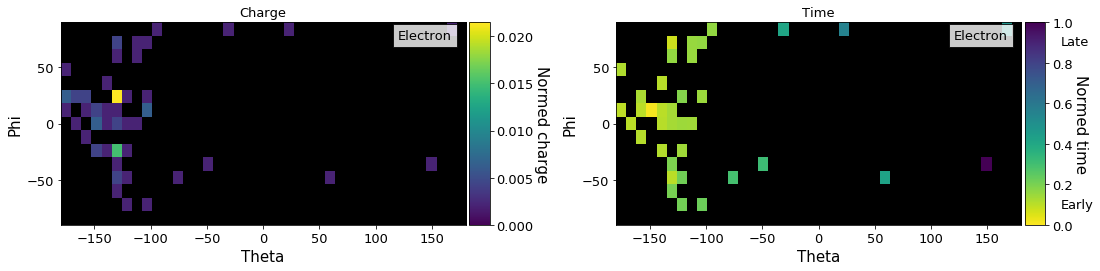

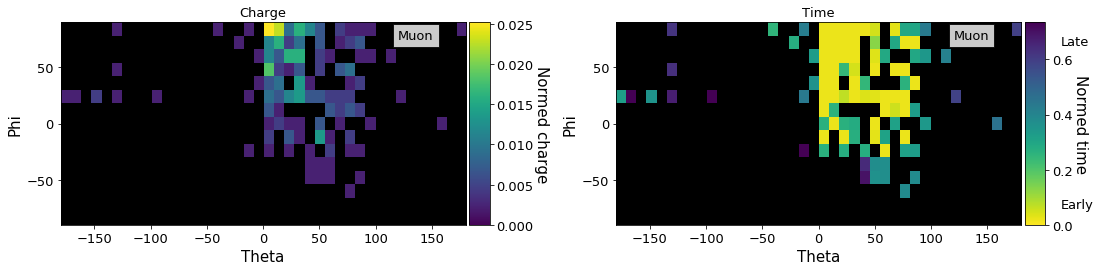

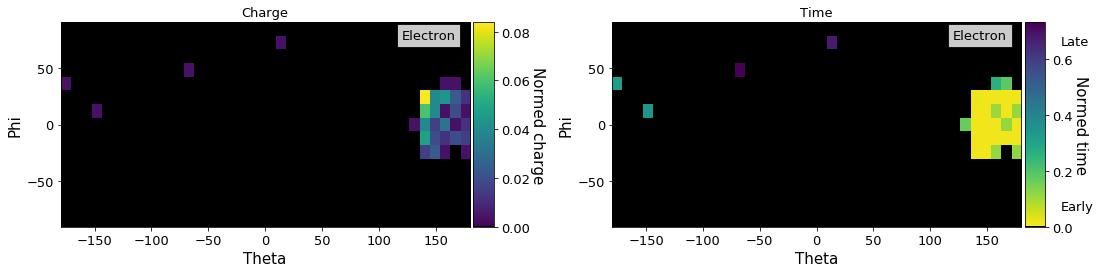

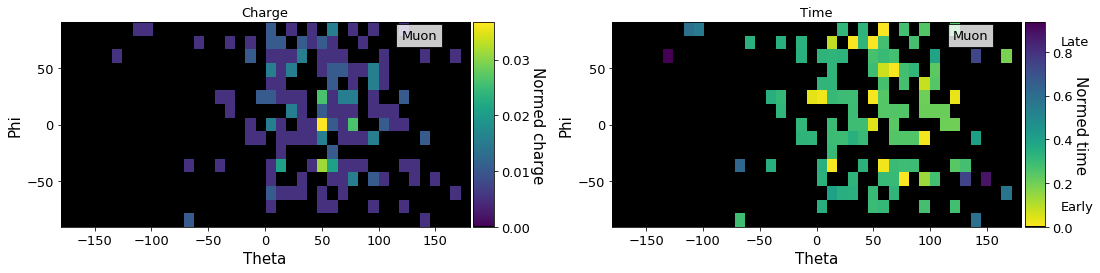

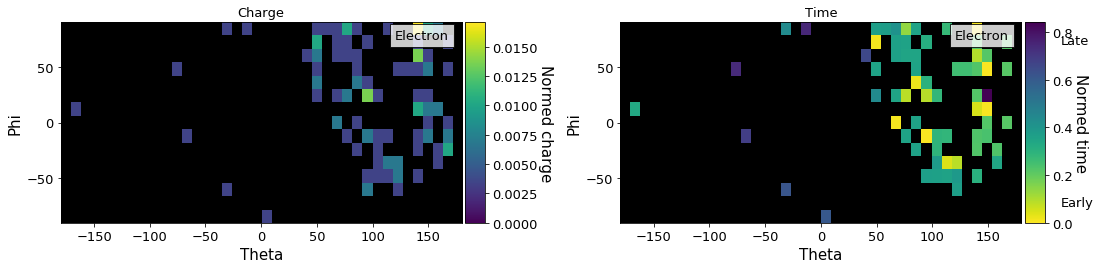

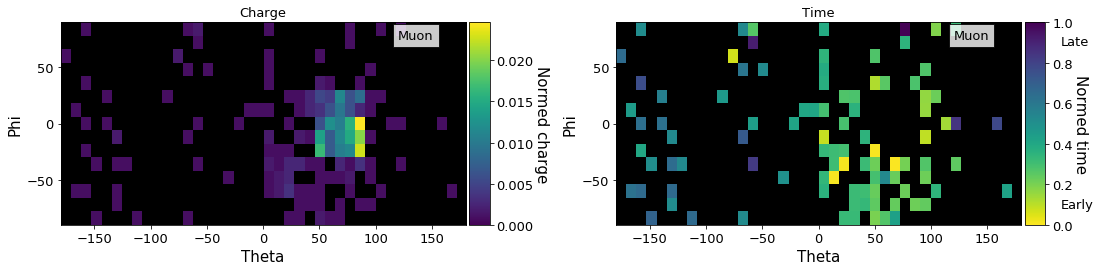

In [7]:


viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
black = np.array([0, 0, 0, 1])
newcolors[0, :] = black

newcmp = ListedColormap(newcolors)

viridis_r = cm.get_cmap('viridis_r', 256)
newcolors_r = viridis_r(np.linspace(0, 1, 256))
black_r = np.array([0, 0, 0, 1])
newcolors_r[0, :] = black_r

newcmp_r = ListedColormap(newcolors_r)
plt.rcParams['figure.figsize'] = [17/1.1, 9/1.1]


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)


SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'bold',
              #'verticalalignment':'bottom'
             }


b=range(0,6,1)#130 im Normalen set           und  im Testset 211 und 611
for a in b:
    if (YTraining[a] == (1,0)).all():
        Title="Muon"
        
        
        #print(Title)
    else:
        Title="Electron"
        #print(Title)
    #4, 15
    fig, (ax1, ax2) = plt.subplots(ncols=2) #ncols=2

    img1 = ax1.imshow(XTraining[a,:,:,0], cmap=newcmp, interpolation='None',extent=[-180,180,-90,90])
    divider = make_axes_locatable(ax1)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    ax1.set_title('Charge')
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Phi')
    ax1.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    cbar = fig.colorbar(img1, cax=cax1)
    cbar.set_label('Normed charge', rotation=270)
    cbar.ax.get_yaxis().labelpad = 15







    #img2 = ax2.imshow(X[a,:,:,1], cmap='twilight_shifted', interpolation='None',norm=DivergingNorm(0.18), extent=[-180,180,-90,90])
    img2 = ax2.imshow(XTraining[a,:,:,1], cmap=newcmp_r, interpolation='None',
                      #norm=DivergingNorm(0.105),
                      extent=[-180,180,-90,90])
    divider = make_axes_locatable(ax2)
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    ax2.set_title('Time')
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Phi')
    ax2.text(120, 75, '{}'.format(Title), #style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

    ax2.text(215, -75, 'Early') #style='italic')
            #bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax2.text(215, +70, 'Late')



    cbar2 = fig.colorbar(img2, cax=cax2)
    cbar2.set_label('Normed time', rotation=270)
    cbar2.ax.get_yaxis().labelpad = 15


    plt.tight_layout(h_pad=1)

 # 23k Set

In [37]:
training_data = list(zip(X, Y))
import random
random.shuffle(training_data)

for sample in training_data[:5]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:17000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[17000:19500]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[19500:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)
del X,Y,X1,X2,X3,Y1,Y2,Y3

Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
(17000, 10, 16, 2) (2500, 10, 16, 2) (4052, 10, 16, 2)


## 120k Set

In [6]:
training_data = list(zip(X, Y))
import random
random.shuffle(training_data)

for sample in training_data[:5]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)
del X,Y,X1,X2,X3,Y1,Y2,Y3

Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
(85000, 15, 40, 2) (20000, 15, 40, 2) (15005, 15, 40, 2)


## Do I want 50/50?

In [208]:
YTrainingnew=[]
XTrainingnew=[]
index=index2=index3=0
for i in YTraining:
    
    if i[0]==1 and index2 <35000:
        XTrainingnew.append(XTraining[index])
        YTrainingnew.append(YTraining[index])
        index2=index2+1
        
    if i[1]==1 and index3 <35000:
        XTrainingnew.append(XTraining[index])
        YTrainingnew.append(YTraining[index])
        index3=index3+1
        
    index=index+1
YTrainingnew=np.array(YTrainingnew)
XTrainingnew=np.array(XTrainingnew)

### Val:
Yvalnew=[]
XValnew=[]
index=index2=index3=0
for i in Yval:
    
    if i[0]==1 and index2 <7000:
        XValnew.append(XVal[index])
        Yvalnew.append(Yval[index])
        index2=index2+1
        
    if i[1]==1 and index3 <7000:
        XValnew.append(XVal[index])
        Yvalnew.append(Yval[index])
        index3=index3+1
        
    index=index+1
Yvalnew=np.array(Yvalnew)
XValnew=np.array(XValnew)

# Testen der besten Methode

Weights

In [196]:

y_ints = [y.argmax() for y in YTrainingnew]
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_ints),
                                                 y_ints)

In [197]:
class_weights

array([1., 1.])

# Modelle Testen

In [8]:
Tiefe = [1,2,3,4]
Batchgrose = [128]
Breite = [50,100,160,300,600]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\LAPPD5x5Perceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTraining.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

            history=model.fit(XTraining,YTraining,
                              validation_data=(XVal,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        tensorboard 
            ],
          epochs= 30)



W0529 12:56:29.027853 23116 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 15, 40, 2)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                60050     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 60,352
Trainable params: 60,252
Non-trainable params: 100
_______________________________________________________

Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 4s 44us/sample - loss: 0.5964 - acc: 0.6810 - val_loss: 0.5753 - val_acc: 0.6988
Epoch 2/30
85000/85000 [==============================] - 3s 41us/sample - loss: 0.5732 - acc: 0.6946 - val_loss: 0.5735 - val_acc: 0.6956
Epoch 3/30
85000/85000 [==============================] - 3s 41us/sample - loss: 0.5717 - acc: 0.6946 - val_loss: 0.5680 - val_acc: 0.7009
Epoch 4/30
85000/85000 [==============================] - 3s 40us/sample - loss: 0.5701 - acc: 0.6961 - val_loss: 0.5755 - val_acc: 0.7000
Epoch 5/30
85000/85000 [==============================] - 4s 43us/sample - loss: 0.5700 - acc: 0.6969 - val_loss: 0.5701 - val_acc: 0.6993
Epoch 6/30
85000/85000 [==============================] - 4s 42us/sample - loss: 0.5687 - acc: 0.6974 - val_loss: 0.5696 - val_acc: 0.7005
Epoch 7/30
85000/85000 [==============================] - 3s 40us/sample - loss: 0.5684 - acc: 0.6976 - val_loss: 0.

Epoch 21/30
85000/85000 [==============================] - 3s 40us/sample - loss: 0.4928 - acc: 0.7516 - val_loss: 0.4894 - val_acc: 0.7581
Epoch 22/30
85000/85000 [==============================] - 4s 41us/sample - loss: 0.4919 - acc: 0.7543 - val_loss: 0.4875 - val_acc: 0.7602
Epoch 23/30
85000/85000 [==============================] - 3s 41us/sample - loss: 0.4876 - acc: 0.7558 - val_loss: 0.4864 - val_acc: 0.7609
Epoch 24/30
85000/85000 [==============================] - 4s 41us/sample - loss: 0.4876 - acc: 0.7572 - val_loss: 0.4858 - val_acc: 0.7602
Epoch 25/30
85000/85000 [==============================] - 3s 41us/sample - loss: 0.4832 - acc: 0.7586 - val_loss: 0.4857 - val_acc: 0.7615
Epoch 26/30
85000/85000 [==============================] - 3s 40us/sample - loss: 0.4817 - acc: 0.7592 - val_loss: 0.4854 - val_acc: 0.7616
Epoch 27/30
85000/85000 [==============================] - 4s 43us/sample - loss: 0.4792 - acc: 0.7624 - val_loss: 0.4842 - val_acc: 0.7627
Epoch 28/30
85000/85

Epoch 1/30
85000/85000 [==============================] - 5s 60us/sample - loss: 0.6101 - acc: 0.6727 - val_loss: 0.5662 - val_acc: 0.6981
Epoch 2/30
85000/85000 [==============================] - 4s 52us/sample - loss: 0.5725 - acc: 0.6949 - val_loss: 0.5618 - val_acc: 0.7017
Epoch 3/30
85000/85000 [==============================] - 4s 53us/sample - loss: 0.5599 - acc: 0.7048 - val_loss: 0.5431 - val_acc: 0.7182
Epoch 4/30
85000/85000 [==============================] - 5s 53us/sample - loss: 0.5414 - acc: 0.7161 - val_loss: 0.5266 - val_acc: 0.7283
Epoch 5/30
85000/85000 [==============================] - 4s 51us/sample - loss: 0.5259 - acc: 0.7302 - val_loss: 0.5159 - val_acc: 0.7383
Epoch 6/30
85000/85000 [==============================] - 5s 53us/sample - loss: 0.5141 - acc: 0.7387 - val_loss: 0.5237 - val_acc: 0.7340
Epoch 7/30
85000/85000 [==============================] - 4s 52us/sample - loss: 0.5007 - acc: 0.7483 - val_loss: 0.4942 - val_acc: 0.7527
Epoch 8/30
85000/85000 [===

Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 5s 64us/sample - loss: 0.6300 - acc: 0.6722 - val_loss: 0.5819 - val_acc: 0.6958
Epoch 2/30
85000/85000 [==============================] - 5s 59us/sample - loss: 0.5701 - acc: 0.6966 - val_loss: 0.5467 - val_acc: 0.7143
Epoch 3/30
85000/85000 [==============================] - 5s 57us/sample - loss: 0.5390 - acc: 0.7202 - val_loss: 0.5173 - val_acc: 0.7328
Epoch 4/30
85000/85000 [==============================] - 5s 56us/sample - loss: 0.5086 - acc: 0.7403 - val_loss: 0.5010 - val_acc: 0.7482
Epoch 5/30
85000/85000 [==============================] - 5s 57us/sample - loss: 0.4919 - acc: 0.7527 - val_loss: 0.4953 - val_acc: 0.7545
Epoch 6/30
85000/85000 [==============================] - 5s 57us/sample - loss: 0.4763 - acc: 0.7632 - val_loss: 0.4894 - val_acc: 0.7558
Epoch 7/30
85000/85000 [==============================] - 5s 56us/sample - loss: 0.4654 - acc: 0.7714 - val_loss: 0.

85000/85000 [==============================] - 6s 68us/sample - loss: 0.4088 - acc: 0.8062 - val_loss: 0.4905 - val_acc: 0.7674
Epoch 30/30
85000/85000 [==============================] - 6s 67us/sample - loss: 0.4051 - acc: 0.8086 - val_loss: 0.4971 - val_acc: 0.7646
Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 15, 40, 2)]       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1200)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 160)               192160    
_________________________________________________________________
batch_normalization_21 (Batc (None, 160)               640       
_________________________________________________________________
dropout_21 (Dropout)         (None, 160)               0 

Epoch 1/30
85000/85000 [==============================] - 7s 81us/sample - loss: 0.6209 - acc: 0.6723 - val_loss: 0.5519 - val_acc: 0.7084
Epoch 2/30
85000/85000 [==============================] - 6s 68us/sample - loss: 0.5514 - acc: 0.7111 - val_loss: 0.5357 - val_acc: 0.7261
Epoch 3/30
85000/85000 [==============================] - 6s 67us/sample - loss: 0.5232 - acc: 0.7322 - val_loss: 0.5101 - val_acc: 0.7412
Epoch 4/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.5027 - acc: 0.7470 - val_loss: 0.5015 - val_acc: 0.7465
Epoch 5/30
85000/85000 [==============================] - 6s 68us/sample - loss: 0.4885 - acc: 0.7571 - val_loss: 0.5071 - val_acc: 0.7375
Epoch 6/30
85000/85000 [==============================] - 6s 68us/sample - loss: 0.4780 - acc: 0.7631 - val_loss: 0.4895 - val_acc: 0.7550
Epoch 7/30
85000/85000 [==============================] - 6s 68us/sample - loss: 0.4661 - acc: 0.7714 - val_loss: 0.4841 - val_acc: 0.7588
Epoch 8/30
85000/85000 [===

85000/85000 [==============================] - 6s 76us/sample - loss: 0.4419 - acc: 0.7897 - val_loss: 0.4841 - val_acc: 0.7656
Epoch 27/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.4404 - acc: 0.7916 - val_loss: 0.4913 - val_acc: 0.7644
Epoch 28/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.4357 - acc: 0.7936 - val_loss: 0.4901 - val_acc: 0.7656
Epoch 29/30
85000/85000 [==============================] - 6s 76us/sample - loss: 0.4344 - acc: 0.7956 - val_loss: 0.4983 - val_acc: 0.7618
Epoch 30/30
85000/85000 [==============================] - 6s 76us/sample - loss: 0.4331 - acc: 0.7960 - val_loss: 0.4885 - val_acc: 0.7653
Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 15, 40, 2)]       0         
_________________________________________________________________
flatten_16 (Flatten)         (Non

Epoch 1/30
85000/85000 [==============================] - 9s 101us/sample - loss: 0.6217 - acc: 0.6685 - val_loss: 0.5659 - val_acc: 0.6988
Epoch 2/30
85000/85000 [==============================] - 7s 80us/sample - loss: 0.5676 - acc: 0.6996 - val_loss: 0.5506 - val_acc: 0.7117
Epoch 3/30
85000/85000 [==============================] - 7s 80us/sample - loss: 0.5461 - acc: 0.7157 - val_loss: 0.5322 - val_acc: 0.7272
Epoch 4/30
85000/85000 [==============================] - 7s 80us/sample - loss: 0.5279 - acc: 0.7305 - val_loss: 0.5171 - val_acc: 0.7372
Epoch 5/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.5133 - acc: 0.7419 - val_loss: 0.5153 - val_acc: 0.7385
Epoch 6/30
85000/85000 [==============================] - 7s 81us/sample - loss: 0.5061 - acc: 0.7450 - val_loss: 0.5170 - val_acc: 0.7407
Epoch 7/30
85000/85000 [==============================] - 7s 81us/sample - loss: 0.4968 - acc: 0.7508 - val_loss: 0.5070 - val_acc: 0.7477
Epoch 8/30
85000/85000 [==

85000/85000 [==============================] - 7s 85us/sample - loss: 0.3082 - acc: 0.8634 - val_loss: 0.5677 - val_acc: 0.7526
Epoch 24/30
85000/85000 [==============================] - 8s 89us/sample - loss: 0.2979 - acc: 0.8702 - val_loss: 0.5890 - val_acc: 0.7509
Epoch 25/30
85000/85000 [==============================] - 7s 85us/sample - loss: 0.2920 - acc: 0.8728 - val_loss: 0.6082 - val_acc: 0.7549
Epoch 26/30
85000/85000 [==============================] - 7s 85us/sample - loss: 0.2839 - acc: 0.8752 - val_loss: 0.6034 - val_acc: 0.7513
Epoch 27/30
85000/85000 [==============================] - 7s 85us/sample - loss: 0.2768 - acc: 0.8787 - val_loss: 0.6087 - val_acc: 0.7516
Epoch 28/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.2701 - acc: 0.8836 - val_loss: 0.6259 - val_acc: 0.7502
Epoch 29/30
85000/85000 [==============================] - 7s 85us/sample - loss: 0.2621 - acc: 0.8862 - val_loss: 0.6442 - val_acc: 0.7505
Epoch 30/30
85000/85000 [=======

# Best Modell

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 15, 40, 2)]       0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 1200)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 50)                60050     
_________________________________________________________________
batch_normalization_50 (Batc (None, 50)                200       
_________________________________________________________________
dropout_50 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_51 (Batc (None, 50)                200   

Epoch 19/80
84352/85000 [============================>.] - ETA: 0s - loss: 0.4620 - acc: 0.7749
Epoch 00019: val_acc improved from 0.76070 to 0.76200, saving model to Perceptron_LAPPD_5x5_PID_120k-improvement-val-acc_0.76.model
85000/85000 [==============================] - 6s 72us/sample - loss: 0.4623 - acc: 0.7746 - val_loss: 0.4813 - val_acc: 0.7620
Epoch 20/80
84864/85000 [============================>.] - ETA: 0s - loss: 0.4603 - acc: 0.7759
Epoch 00020: val_acc did not improve from 0.76200
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4602 - acc: 0.7760 - val_loss: 0.4854 - val_acc: 0.7594
Epoch 21/80
84608/85000 [============================>.] - ETA: 0s - loss: 0.4579 - acc: 0.7776
Epoch 00021: val_acc did not improve from 0.76200
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4579 - acc: 0.7776 - val_loss: 0.4844 - val_acc: 0.7608
Epoch 22/80
84736/85000 [============================>.] - ETA: 0s - loss: 0.4531 - acc: 0.7800


Epoch 47/80
84608/85000 [============================>.] - ETA: 0s - loss: 0.4074 - acc: 0.8115
Epoch 00047: val_acc did not improve from 0.76825
85000/85000 [==============================] - 6s 73us/sample - loss: 0.4073 - acc: 0.8116 - val_loss: 0.4961 - val_acc: 0.7668
Epoch 48/80
84224/85000 [============================>.] - ETA: 0s - loss: 0.4041 - acc: 0.8118
Epoch 00048: val_acc improved from 0.76825 to 0.76885, saving model to Perceptron_LAPPD_5x5_PID_120k-improvement-val-acc_0.77.model
85000/85000 [==============================] - 6s 74us/sample - loss: 0.4042 - acc: 0.8118 - val_loss: 0.4912 - val_acc: 0.7689
Epoch 49/80
84608/85000 [============================>.] - ETA: 0s - loss: 0.4037 - acc: 0.8127
Epoch 00049: val_acc improved from 0.76885 to 0.76970, saving model to Perceptron_LAPPD_5x5_PID_120k-improvement-val-acc_0.77.model
85000/85000 [==============================] - 7s 77us/sample - loss: 0.4038 - acc: 0.8127 - val_loss: 0.4989 - val_acc: 0.7697
Epoch 50/80
84

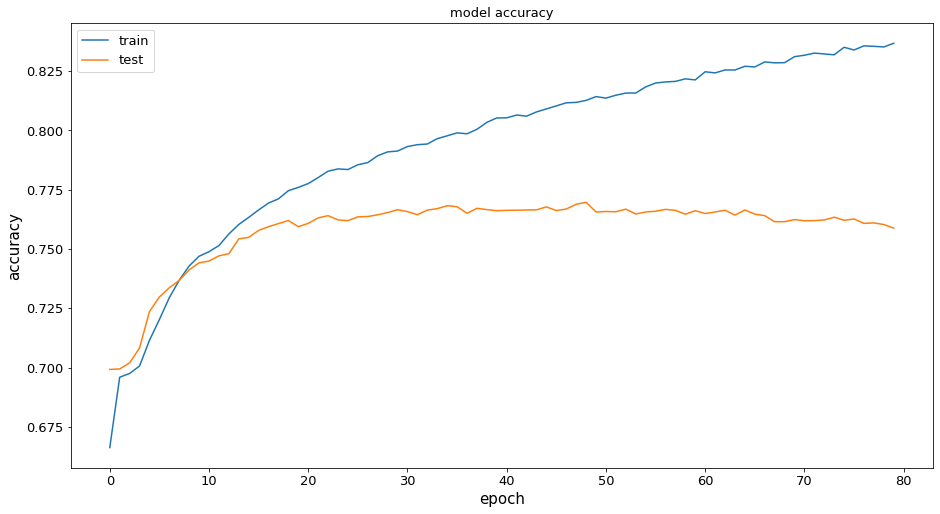

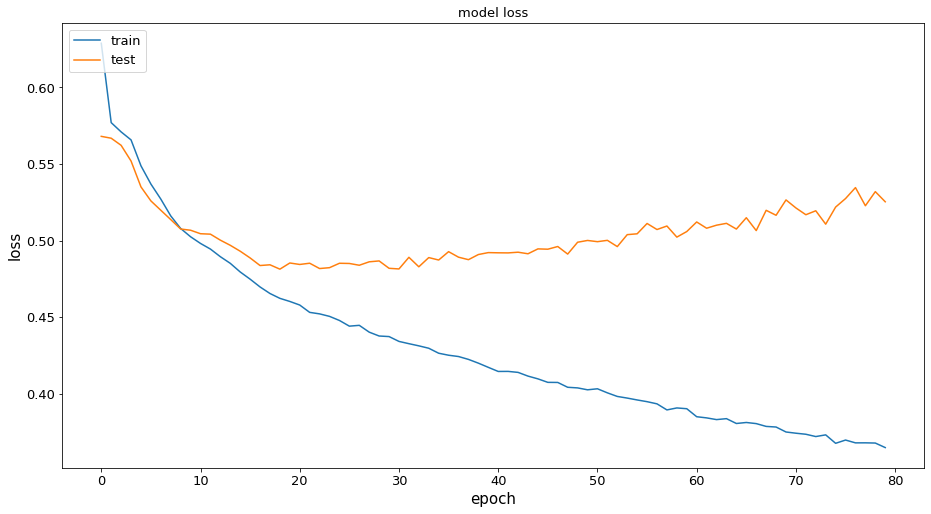

Ende des Versuchs: 


In [14]:
Tiefe = [3]
Batchgrose = [128]
Breite = [50]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\LAPPD5x5Perceptron\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTraining.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()
                          
            filepath="Perceptron_LAPPD_5x5_PID_120k-improvement-val-acc_{val_acc:.2f}.model"  
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

            history=model.fit(XTraining,YTraining,
                              validation_data=(XVal,Yval)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint
                        #tensorboard 
            ],epochs=80)
          
        
            print(history.history.keys())
            # summarize history for accuracy
            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
            # summarize history for loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()

            print("Ende des Versuchs: ")


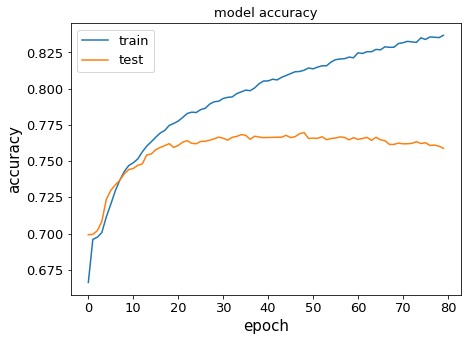

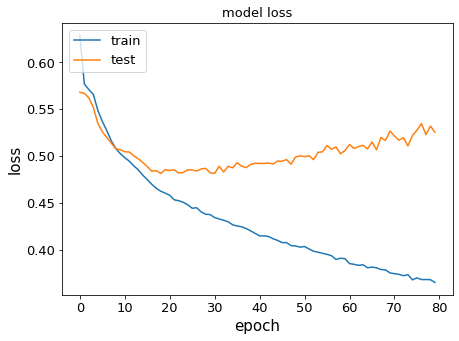

Ende des Versuchs: 


In [21]:
plt.rcParams['figure.figsize'] = [7, 5]
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# Evaluate

In [22]:
model = tf.keras.models.load_model("Perceptron_LAPPD_5x5_PID_120k-improvement-val-acc_0.77.model")

W0529 14:23:55.942609 23116 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0529 14:23:55.942609 23116 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0529 14:23:55.942609 23116 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [23]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.4868744076112635
Test accuracy:  0.7707431


In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:


rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[5067 2429]
 [1011 6498]]


[[0.67596051 0.32403949]
 [0.13463843 0.86536157]]


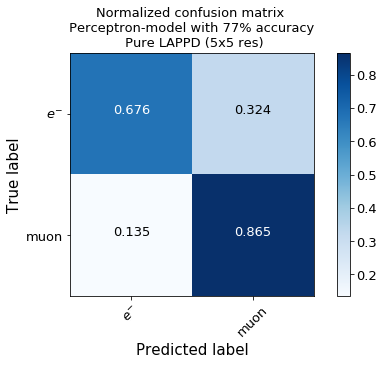

In [26]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n Perceptron-model with 77% accuracy \n Pure LAPPD (5x5 res)')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# Charge and Time Analysis

In [42]:
XTrainingT= XTraining[:,:,:,1].reshape(17000,9,24,1)
XTestT = XTest[:,:,:,1].reshape(4052,9,24,1)
XValT = XVal[:,:,:,1].reshape(2500,9,24,1)
XTrainingC= XTraining[:,:,:,0].reshape(17000,9,24,1)
XTestC = XTest[:,:,:,0].reshape(4052,9,24,1)
XValC = XVal[:,:,:,0].reshape(2500,9,24,1)

In [57]:
dense_layers = [0,1,2,3]
layer_sizes = [15,50,100,150]
conv_layers = [0,1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            
            NAME ="LAPPD-Charge-3x3-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\LAPPD\{}'.format(NAME))
        
        
            model = Sequential()
            model.add(Conv2D(layer_size,(9,9),strides=1, input_shape= XTrainingC.shape[1:],activation="relu", padding='same'))                                               
            model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            for l in range(conv_layer-1):                   
                model.add(Conv2D(layer_size,(3,3),padding='same',activation="relu"))              
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))            
            #model.add(GlobalAveragePooling2D())
            model.add(Flatten())
            for l in range(dense_layer-1):
                model.add(Dense(512-l*20 ,activation="relu" ))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
            model.add(Dense(32,activation="relu"))
            model.add(BatchNormalization())
            model.add(Dropout(0.2))
            model.add(Dense(2))
            model.add(Activation('softmax'))
            #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
            model.compile(loss="binary_crossentropy",
                         optimizer="adam",
                          metrics=['accuracy']
                         )   
            #filepath="LAPPD_Charge_Only_batchnormed_PI_22k-improvement-val-acc_{val_acc:.2f}.model"  
            #checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            #model.summary()
            history=model.fit(XTrainingC,YTraining,
          validation_data=(XValC,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        tensorboard 
            ],
          epochs= 30)
            

Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 4s 207us/sample - loss: 0.6991 - acc: 0.5004 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 2/30
17000/17000 [==============================] - 1s 76us/sample - loss: 0.6944 - acc: 0.4982 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 1s 71us/sample - loss: 0.6936 - acc: 0.5052 - val_loss: 0.6938 - val_acc: 0.4956
Epoch 4/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.6942 - acc: 0.5001 - val_loss: 0.6970 - val_acc: 0.5044
Epoch 5/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.6945 - acc: 0.4915 - val_loss: 0.6938 - val_acc: 0.4956
Epoch 6/30
17000/17000 [==============================] - 1s 87us/sample - loss: 0.6939 - acc: 0.4966 - val_loss: 0.6941 - val_acc: 0.5044
Epoch 7/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.6937 - acc: 0.4998 - val_loss: 0.

Epoch 29/30
17000/17000 [==============================] - 1s 85us/sample - loss: 0.6934 - acc: 0.4916 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 30/30
17000/17000 [==============================] - 1s 80us/sample - loss: 0.6933 - acc: 0.4994 - val_loss: 0.6933 - val_acc: 0.5044
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 4s 239us/sample - loss: 0.7066 - acc: 0.5031 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 2/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.6946 - acc: 0.5100 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 2s 93us/sample - loss: 0.6937 - acc: 0.4988 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 4/30
17000/17000 [==============================] - 2s 97us/sample - loss: 0.6933 - acc: 0.4976 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 5/30
17000/17000 [==============================] - 1s 86us/sample - loss: 0.6933 - acc: 0.4952 - val_loss: 

Epoch 27/30
17000/17000 [==============================] - 2s 96us/sample - loss: 0.6934 - acc: 0.5108 - val_loss: 0.6938 - val_acc: 0.4956
Epoch 28/30
17000/17000 [==============================] - 2s 98us/sample - loss: 0.6939 - acc: 0.4996 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 29/30
17000/17000 [==============================] - 2s 99us/sample - loss: 0.6938 - acc: 0.4984 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 30/30
17000/17000 [==============================] - 2s 98us/sample - loss: 0.6938 - acc: 0.4954 - val_loss: 0.6933 - val_acc: 0.4956
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 4s 243us/sample - loss: 0.7052 - acc: 0.4984 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 2/30
17000/17000 [==============================] - 1s 80us/sample - loss: 0.6958 - acc: 0.5006 - val_loss: 0.6938 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 1s 84us/sample - loss: 0.6950 - acc: 0.4998 - val_loss

Epoch 25/30
17000/17000 [==============================] - 1s 77us/sample - loss: 0.6936 - acc: 0.4969 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 26/30
17000/17000 [==============================] - 1s 72us/sample - loss: 0.6937 - acc: 0.4974 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 27/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.6935 - acc: 0.4964 - val_loss: 0.6947 - val_acc: 0.5044
Epoch 28/30
17000/17000 [==============================] - 1s 74us/sample - loss: 0.6936 - acc: 0.4964 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 29/30
17000/17000 [==============================] - 1s 78us/sample - loss: 0.6936 - acc: 0.4974 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 30/30
17000/17000 [==============================] - 1s 73us/sample - loss: 0.6938 - acc: 0.5014 - val_loss: 0.7525 - val_acc: 0.4956
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 4s 245us/sample - loss: 0.7076 - acc: 0.5027 - val_lo

Epoch 23/30
17000/17000 [==============================] - 2s 118us/sample - loss: 0.6938 - acc: 0.5016 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 24/30
17000/17000 [==============================] - 2s 111us/sample - loss: 0.6938 - acc: 0.5021 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 25/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6935 - acc: 0.5018 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 26/30
17000/17000 [==============================] - 2s 101us/sample - loss: 0.6937 - acc: 0.5045 - val_loss: 0.6937 - val_acc: 0.5044
Epoch 27/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6935 - acc: 0.5065 - val_loss: 0.6933 - val_acc: 0.5044
Epoch 28/30
17000/17000 [==============================] - 2s 99us/sample - loss: 0.6940 - acc: 0.4964 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 29/30
17000/17000 [==============================] - 2s 99us/sample - loss: 0.6937 - acc: 0.4984 - val_loss: 0.6940 - val_acc: 0.4956
Epoch 30/30
170

Epoch 21/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.6933 - acc: 0.5017 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 22/30
17000/17000 [==============================] - 1s 81us/sample - loss: 0.6934 - acc: 0.4956 - val_loss: 0.6931 - val_acc: 0.4956
Epoch 23/30
17000/17000 [==============================] - 1s 80us/sample - loss: 0.6934 - acc: 0.5002 - val_loss: 0.6939 - val_acc: 0.4956
Epoch 24/30
17000/17000 [==============================] - 2s 90us/sample - loss: 0.6933 - acc: 0.5050 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 25/30
17000/17000 [==============================] - 1s 85us/sample - loss: 0.6945 - acc: 0.4974 - val_loss: 0.7704 - val_acc: 0.4956
Epoch 26/30
17000/17000 [==============================] - 2s 90us/sample - loss: 0.6940 - acc: 0.5003 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 27/30
17000/17000 [==============================] - 2s 91us/sample - loss: 0.6934 - acc: 0.5026 - val_loss: 0.6939 - val_acc: 0.4956
Epoch 28/30
17000/17

Epoch 19/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6937 - acc: 0.5023 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 20/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6939 - acc: 0.4929 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 21/30
17000/17000 [==============================] - 2s 107us/sample - loss: 0.6938 - acc: 0.4966 - val_loss: 0.6935 - val_acc: 0.4956
Epoch 22/30
17000/17000 [==============================] - 2s 103us/sample - loss: 0.6937 - acc: 0.4999 - val_loss: 0.6933 - val_acc: 0.5044
Epoch 23/30
17000/17000 [==============================] - 2s 107us/sample - loss: 0.6937 - acc: 0.4987 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 24/30
17000/17000 [==============================] - 2s 108us/sample - loss: 0.6940 - acc: 0.5009 - val_loss: 0.6934 - val_acc: 0.5044
Epoch 25/30
17000/17000 [==============================] - 2s 105us/sample - loss: 0.6937 - acc: 0.4940 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 26/30
1

Epoch 17/30
17000/17000 [==============================] - 1s 88us/sample - loss: 0.6935 - acc: 0.4931 - val_loss: 0.6936 - val_acc: 0.5044
Epoch 18/30
17000/17000 [==============================] - 2s 91us/sample - loss: 0.6933 - acc: 0.5038 - val_loss: 0.7379 - val_acc: 0.5044
Epoch 19/30
17000/17000 [==============================] - 1s 88us/sample - loss: 0.6954 - acc: 0.4933 - val_loss: 0.7100 - val_acc: 0.4956
Epoch 20/30
17000/17000 [==============================] - 1s 87us/sample - loss: 0.6938 - acc: 0.4959 - val_loss: 0.6967 - val_acc: 0.5044
Epoch 21/30
17000/17000 [==============================] - 1s 87us/sample - loss: 0.6935 - acc: 0.5035 - val_loss: 0.6939 - val_acc: 0.4956
Epoch 22/30
17000/17000 [==============================] - 2s 96us/sample - loss: 0.6937 - acc: 0.4970 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 23/30
17000/17000 [==============================] - 1s 88us/sample - loss: 0.6936 - acc: 0.5009 - val_loss: 0.6947 - val_acc: 0.5044
Epoch 24/30
17000/17

Epoch 12/30
17000/17000 [==============================] - 1s 85us/sample - loss: 0.6936 - acc: 0.4996 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 13/30
17000/17000 [==============================] - 1s 82us/sample - loss: 0.6937 - acc: 0.4912 - val_loss: 0.6934 - val_acc: 0.5044
Epoch 14/30
17000/17000 [==============================] - 1s 79us/sample - loss: 0.6934 - acc: 0.4969 - val_loss: 0.6933 - val_acc: 0.5044
Epoch 15/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.6933 - acc: 0.4971 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 16/30
17000/17000 [==============================] - 1s 82us/sample - loss: 0.6933 - acc: 0.4984 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 17/30
17000/17000 [==============================] - 1s 80us/sample - loss: 0.6931 - acc: 0.5067 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 18/30
17000/17000 [==============================] - 1s 80us/sample - loss: 0.6932 - acc: 0.5030 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 19/30
17000/17

Epoch 10/30
17000/17000 [==============================] - 2s 103us/sample - loss: 0.6935 - acc: 0.5058 - val_loss: 0.6934 - val_acc: 0.5044
Epoch 11/30
17000/17000 [==============================] - 2s 100us/sample - loss: 0.6941 - acc: 0.5044 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 12/30
17000/17000 [==============================] - 2s 100us/sample - loss: 0.6937 - acc: 0.5033 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 13/30
17000/17000 [==============================] - 2s 112us/sample - loss: 0.6938 - acc: 0.5001 - val_loss: 0.6936 - val_acc: 0.4956
Epoch 14/30
17000/17000 [==============================] - 2s 101us/sample - loss: 0.6943 - acc: 0.4955 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 15/30
17000/17000 [==============================] - 2s 102us/sample - loss: 0.6939 - acc: 0.5021 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 16/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6941 - acc: 0.4959 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 17/30
1

Epoch 8/30
17000/17000 [==============================] - 1s 87us/sample - loss: 0.6933 - acc: 0.5027 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 9/30
17000/17000 [==============================] - 1s 85us/sample - loss: 0.6935 - acc: 0.4936 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 10/30
17000/17000 [==============================] - 1s 84us/sample - loss: 0.6933 - acc: 0.5021 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 11/30
17000/17000 [==============================] - 1s 87us/sample - loss: 0.6935 - acc: 0.4987 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 12/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.6932 - acc: 0.5068 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 13/30
17000/17000 [==============================] - 1s 83us/sample - loss: 0.6934 - acc: 0.4941 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 14/30
17000/17000 [==============================] - 1s 84us/sample - loss: 0.6932 - acc: 0.4985 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 15/30
17000/1700

Epoch 6/30
17000/17000 [==============================] - 2s 107us/sample - loss: 0.6969 - acc: 0.4962 - val_loss: 0.6939 - val_acc: 0.5044
Epoch 7/30
17000/17000 [==============================] - 2s 103us/sample - loss: 0.6953 - acc: 0.5028 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 8/30
17000/17000 [==============================] - 2s 107us/sample - loss: 0.6935 - acc: 0.5136 - val_loss: 0.6936 - val_acc: 0.5044
Epoch 9/30
17000/17000 [==============================] - 2s 109us/sample - loss: 0.6944 - acc: 0.4981 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 10/30
17000/17000 [==============================] - 2s 103us/sample - loss: 0.6942 - acc: 0.4967 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 11/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6941 - acc: 0.4982 - val_loss: 0.6942 - val_acc: 0.4956
Epoch 12/30
17000/17000 [==============================] - 2s 106us/sample - loss: 0.6940 - acc: 0.5012 - val_loss: 0.6938 - val_acc: 0.4956
Epoch 13/30
17000

Epoch 4/30
17000/17000 [==============================] - 2s 91us/sample - loss: 0.6935 - acc: 0.4989 - val_loss: 0.6989 - val_acc: 0.4956
Epoch 5/30
17000/17000 [==============================] - 2s 94us/sample - loss: 0.6936 - acc: 0.4979 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 6/30
17000/17000 [==============================] - 2s 89us/sample - loss: 0.6932 - acc: 0.5038 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 7/30
17000/17000 [==============================] - 1s 88us/sample - loss: 0.6933 - acc: 0.5045 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 8/30
17000/17000 [==============================] - 2s 89us/sample - loss: 0.6933 - acc: 0.4985 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 9/30
17000/17000 [==============================] - 2s 93us/sample - loss: 0.6935 - acc: 0.4954 - val_loss: 0.7013 - val_acc: 0.4956
Epoch 10/30
17000/17000 [==============================] - 2s 88us/sample - loss: 0.6935 - acc: 0.4929 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 11/30
17000/17000 [=

Epoch 2/30
17000/17000 [==============================] - 2s 118us/sample - loss: 0.7223 - acc: 0.4937 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 2s 114us/sample - loss: 0.7073 - acc: 0.4971 - val_loss: 0.6945 - val_acc: 0.4956
Epoch 4/30
17000/17000 [==============================] - 2s 121us/sample - loss: 0.6978 - acc: 0.5068 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 5/30
17000/17000 [==============================] - 2s 116us/sample - loss: 0.6965 - acc: 0.4951 - val_loss: 0.6933 - val_acc: 0.5044
Epoch 6/30
17000/17000 [==============================] - 2s 116us/sample - loss: 0.6948 - acc: 0.5044 - val_loss: 0.6933 - val_acc: 0.5044
Epoch 7/30
17000/17000 [==============================] - 2s 117us/sample - loss: 0.6941 - acc: 0.5006 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 8/30
17000/17000 [==============================] - 2s 114us/sample - loss: 0.6935 - acc: 0.5079 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 9/30
17000/170

17000/17000 [==============================] - 2s 100us/sample - loss: 0.6935 - acc: 0.5014 - val_loss: 0.6938 - val_acc: 0.4956
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 6s 345us/sample - loss: 0.7011 - acc: 0.5038 - val_loss: 0.6936 - val_acc: 0.4956
Epoch 2/30
17000/17000 [==============================] - 2s 99us/sample - loss: 0.6974 - acc: 0.4971 - val_loss: 0.7169 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 2s 96us/sample - loss: 0.6958 - acc: 0.5023 - val_loss: 0.7066 - val_acc: 0.4956
Epoch 4/30
17000/17000 [==============================] - 2s 97us/sample - loss: 0.6947 - acc: 0.4985 - val_loss: 0.6944 - val_acc: 0.4956
Epoch 5/30
17000/17000 [==============================] - 2s 104us/sample - loss: 0.6934 - acc: 0.5038 - val_loss: 0.6937 - val_acc: 0.4956
Epoch 6/30
17000/17000 [==============================] - 2s 97us/sample - loss: 0.6936 - acc: 0.4969 - val_loss: 0.6931 - va

Epoch 28/30
17000/17000 [==============================] - 2s 113us/sample - loss: 0.6938 - acc: 0.4929 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 29/30
17000/17000 [==============================] - 2s 115us/sample - loss: 0.6934 - acc: 0.4954 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 30/30
17000/17000 [==============================] - 2s 116us/sample - loss: 0.6935 - acc: 0.4964 - val_loss: 0.6937 - val_acc: 0.4956
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 7s 397us/sample - loss: 0.8456 - acc: 0.5011 - val_loss: 0.7070 - val_acc: 0.5044
Epoch 2/30
17000/17000 [==============================] - 2s 125us/sample - loss: 0.7230 - acc: 0.5063 - val_loss: 0.6995 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 2s 129us/sample - loss: 0.7064 - acc: 0.4990 - val_loss: 0.7119 - val_acc: 0.4956
Epoch 4/30
17000/17000 [==============================] - 2s 130us/sample - loss: 0.6988 - acc: 0.5005 - val

17000/17000 [==============================] - 2s 123us/sample - loss: 0.6938 - acc: 0.4985 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 23/30
17000/17000 [==============================] - 2s 119us/sample - loss: 0.6938 - acc: 0.5045 - val_loss: 0.6934 - val_acc: 0.5044
Epoch 24/30
17000/17000 [==============================] - 2s 130us/sample - loss: 0.6938 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 25/30
17000/17000 [==============================] - 2s 123us/sample - loss: 0.6938 - acc: 0.4984 - val_loss: 0.6937 - val_acc: 0.4956
Epoch 26/30
17000/17000 [==============================] - 2s 125us/sample - loss: 0.6938 - acc: 0.5012 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 27/30
17000/17000 [==============================] - 2s 127us/sample - loss: 0.6937 - acc: 0.5040 - val_loss: 0.6948 - val_acc: 0.5044
Epoch 28/30
17000/17000 [==============================] - 2s 119us/sample - loss: 0.6938 - acc: 0.4970 - val_loss: 0.6945 - val_acc: 0.4956
Epoch 29/30
17000/17000 [

17000/17000 [==============================] - 2s 137us/sample - loss: 0.6939 - acc: 0.5024 - val_loss: 0.6942 - val_acc: 0.4956
Epoch 17/30
17000/17000 [==============================] - 3s 157us/sample - loss: 0.6938 - acc: 0.5021 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 18/30
17000/17000 [==============================] - 2s 143us/sample - loss: 0.6937 - acc: 0.5009 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 19/30
17000/17000 [==============================] - 2s 131us/sample - loss: 0.6938 - acc: 0.5034 - val_loss: 0.6947 - val_acc: 0.4956
Epoch 20/30
17000/17000 [==============================] - 2s 128us/sample - loss: 0.6941 - acc: 0.4986 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 21/30
17000/17000 [==============================] - 2s 140us/sample - loss: 0.6941 - acc: 0.5002 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 22/30
17000/17000 [==============================] - 2s 133us/sample - loss: 0.6938 - acc: 0.4993 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 23/30
17000/17000 [

17000/17000 [==============================] - 2s 142us/sample - loss: 0.6940 - acc: 0.4979 - val_loss: 0.6944 - val_acc: 0.4956
Epoch 11/30
17000/17000 [==============================] - 2s 145us/sample - loss: 0.6940 - acc: 0.4959 - val_loss: 0.6938 - val_acc: 0.4956
Epoch 12/30
17000/17000 [==============================] - 2s 139us/sample - loss: 0.6939 - acc: 0.5015 - val_loss: 0.6963 - val_acc: 0.4956
Epoch 13/30
17000/17000 [==============================] - 2s 141us/sample - loss: 0.6940 - acc: 0.4968 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 14/30
17000/17000 [==============================] - 2s 137us/sample - loss: 0.6935 - acc: 0.5045 - val_loss: 0.6936 - val_acc: 0.5044
Epoch 15/30
17000/17000 [==============================] - 2s 142us/sample - loss: 0.6939 - acc: 0.4958 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 16/30
17000/17000 [==============================] - 2s 139us/sample - loss: 0.6936 - acc: 0.5060 - val_loss: 0.6947 - val_acc: 0.4956
Epoch 17/30
17000/17000 [

17000/17000 [==============================] - 3s 158us/sample - loss: 0.7001 - acc: 0.5006 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 5/30
17000/17000 [==============================] - 3s 155us/sample - loss: 0.6972 - acc: 0.4990 - val_loss: 0.6955 - val_acc: 0.4956
Epoch 6/30
17000/17000 [==============================] - 3s 157us/sample - loss: 0.6945 - acc: 0.5058 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 7/30
17000/17000 [==============================] - 3s 154us/sample - loss: 0.6945 - acc: 0.5011 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 8/30
17000/17000 [==============================] - 3s 157us/sample - loss: 0.6943 - acc: 0.4974 - val_loss: 0.6935 - val_acc: 0.4956
Epoch 9/30
17000/17000 [==============================] - 3s 157us/sample - loss: 0.6937 - acc: 0.5057 - val_loss: 0.6936 - val_acc: 0.5044
Epoch 10/30
17000/17000 [==============================] - 3s 153us/sample - loss: 0.6941 - acc: 0.4994 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 11/30
17000/17000 [=====

Epoch 29/30
17000/17000 [==============================] - 3s 153us/sample - loss: 0.6938 - acc: 0.5042 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 30/30
17000/17000 [==============================] - 3s 149us/sample - loss: 0.6935 - acc: 0.5039 - val_loss: 0.6932 - val_acc: 0.5044
Train on 17000 samples, validate on 2500 samples
Epoch 1/30
17000/17000 [==============================] - 10s 577us/sample - loss: 0.8370 - acc: 0.5039 - val_loss: 0.6956 - val_acc: 0.5044
Epoch 2/30
17000/17000 [==============================] - 3s 165us/sample - loss: 0.7281 - acc: 0.5058 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 3/30
17000/17000 [==============================] - 3s 163us/sample - loss: 0.7074 - acc: 0.5047 - val_loss: 0.6935 - val_acc: 0.5044
Epoch 4/30
17000/17000 [==============================] - 3s 172us/sample - loss: 0.6991 - acc: 0.5074 - val_loss: 0.6933 - val_acc: 0.5044
Epoch 5/30
17000/17000 [==============================] - 3s 165us/sample - loss: 0.6966 - acc: 0.5045 - val

17000/17000 [==============================] - 3s 163us/sample - loss: 0.6938 - acc: 0.5028 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 24/30
17000/17000 [==============================] - 3s 157us/sample - loss: 0.6941 - acc: 0.4956 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 25/30
17000/17000 [==============================] - 3s 163us/sample - loss: 0.6936 - acc: 0.5042 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 26/30
17000/17000 [==============================] - 3s 164us/sample - loss: 0.6938 - acc: 0.5069 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 27/30
17000/17000 [==============================] - 3s 167us/sample - loss: 0.6937 - acc: 0.4976 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 28/30
17000/17000 [==============================] - 3s 159us/sample - loss: 0.6937 - acc: 0.5027 - val_loss: 0.6944 - val_acc: 0.4956
Epoch 29/30
17000/17000 [==============================] - 3s 162us/sample - loss: 0.6935 - acc: 0.5014 - val_loss: 0.6936 - val_acc: 0.4956
Epoch 30/30
17000/17000 [

17000/17000 [==============================] - 3s 178us/sample - loss: 0.6937 - acc: 0.4991 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 18/30
17000/17000 [==============================] - 3s 170us/sample - loss: 0.6939 - acc: 0.4996 - val_loss: 0.6945 - val_acc: 0.5044
Epoch 19/30
17000/17000 [==============================] - 3s 170us/sample - loss: 0.6939 - acc: 0.5026 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 20/30
17000/17000 [==============================] - 3s 167us/sample - loss: 0.6938 - acc: 0.4984 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 21/30
17000/17000 [==============================] - 3s 173us/sample - loss: 0.6943 - acc: 0.4976 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 22/30
17000/17000 [==============================] - 3s 165us/sample - loss: 0.6938 - acc: 0.4959 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 23/30
17000/17000 [==============================] - 3s 170us/sample - loss: 0.6938 - acc: 0.5038 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 24/30
17000/17000 [

17000/17000 [==============================] - 3s 183us/sample - loss: 0.6938 - acc: 0.5027 - val_loss: 0.6932 - val_acc: 0.4956
Epoch 12/30
17000/17000 [==============================] - 3s 177us/sample - loss: 0.6940 - acc: 0.4991 - val_loss: 0.6936 - val_acc: 0.4956
Epoch 13/30
17000/17000 [==============================] - 3s 182us/sample - loss: 0.6940 - acc: 0.4948 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 14/30
17000/17000 [==============================] - 3s 184us/sample - loss: 0.6943 - acc: 0.4922 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 15/30
17000/17000 [==============================] - 3s 179us/sample - loss: 0.6937 - acc: 0.4966 - val_loss: 0.6934 - val_acc: 0.4956
Epoch 16/30
17000/17000 [==============================] - 3s 183us/sample - loss: 0.6939 - acc: 0.4973 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 17/30
17000/17000 [==============================] - 3s 184us/sample - loss: 0.6942 - acc: 0.4950 - val_loss: 0.6932 - val_acc: 0.5044
Epoch 18/30
17000/17000 [

In [77]:
inputs = tf.keras.Input(shape=XTrainingC.shape[1:], name='img')
x= layers.Flatten()(inputs)

x= layers.BatchNormalization()(x)
x = layers.Dense(150, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x= layers.BatchNormalization()(x)
x = layers.Dense(100, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(50, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(50, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)


#outputs = layers.Dense(1,activation='sigmoid')(x)
outputs = layers.Dense(2, activation='softmax')(x)



model = tf.keras.Model(inputs, outputs, name='Model')

model.summary()

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 16, 1)]       0         
_________________________________________________________________
flatten_147 (Flatten)        (None, 160)               0         
_________________________________________________________________
batch_normalization_396 (Bat (None, 160)               640       
_________________________________________________________________
dense_364 (Dense)            (None, 150)               24150     
_________________________________________________________________
batch_normalization_397 (Bat (None, 150)               600       
_________________________________________________________________
dropout_429 (Dropout)        (None, 150)               0         
_________________________________________________________________
batch_normalization_398 (Bat (None, 150)               600   

Train on 17000 samples, validate on 2500 samples
Epoch 1/60
17000/17000 [==============================] - 18s 1ms/sample - loss: 0.7725 - acc: 0.5490 - val_loss: 0.6910 - val_acc: 0.5080
Epoch 2/60
17000/17000 [==============================] - 4s 207us/sample - loss: 0.6965 - acc: 0.5804 - val_loss: 0.6971 - val_acc: 0.4972
Epoch 3/60
17000/17000 [==============================] - 4s 208us/sample - loss: 0.6659 - acc: 0.5988 - val_loss: 0.8294 - val_acc: 0.4916
Epoch 4/60
17000/17000 [==============================] - 4s 209us/sample - loss: 0.6433 - acc: 0.6241 - val_loss: 1.2116 - val_acc: 0.4924
Epoch 5/60
17000/17000 [==============================] - 4s 211us/sample - loss: 0.6168 - acc: 0.6520 - val_loss: 1.0946 - val_acc: 0.4980
Epoch 6/60
17000/17000 [==============================] - 4s 211us/sample - loss: 0.5943 - acc: 0.6675 - val_loss: 1.0440 - val_acc: 0.5052
Epoch 7/60
17000/17000 [==============================] - 4s 210us/sample - loss: 0.5803 - acc: 0.6821 - val_los

Epoch 59/60
17000/17000 [==============================] - 4s 207us/sample - loss: 0.3411 - acc: 0.8453 - val_loss: 0.6283 - val_acc: 0.7140
Epoch 60/60
17000/17000 [==============================] - 4s 211us/sample - loss: 0.3342 - acc: 0.8488 - val_loss: 0.6639 - val_acc: 0.7080
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


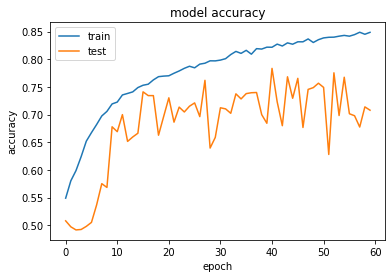

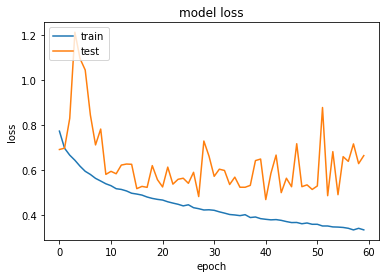

Ende des Versuchs: 


In [78]:
model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

history=model.fit(XTrainingC,YTraining,
          validation_data=(XValC,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        #tensorboard 
            ],
          epochs= 60)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

In [66]:
dense_layers = [0,1,2,3]


#for dense_layer in dense_layers:


NAME ="LAPPD-Charge-3x3-MuEl-{}-conv-{}-nodes-{}-dense".format(conv_layer, layer_size, dense_layer) #,int(time.time())
tensorboard = TensorBoard(log_dir = 'logs\LAPPDPerceptron\{}'.format(NAME))


model = Sequential()
model.add(Flatten())

for l in range(3):
    model.add(Dense(512-l*50 ,activation="relu" ))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
#model.add(Dense(32,activation="relu"))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))

#adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
model.compile(loss="binary_crossentropy",
             optimizer="adam",
              metrics=['accuracy']
             )   
#filepath="LAPPD_Charge_Only_batchnormed_PI_22k-improvement-val-acc_{val_acc:.2f}.model"  
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
#model.summary()
#         history=model.fit(XTrainingC,YTraining,
#       validation_data=(XValC,Yval)
#       ,batch_size=100,
#         shuffle=True,
#         class_weight='balanced',
#         callbacks=[
#                     #monitor,
#                     #checkpoint,
#                     tensorboard 
#         ],
#       epochs= 30)


W0514 14:02:27.200614  2760 deprecation.py:323] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 17000 samples, validate on 2500 samples
Epoch 1/40
17000/17000 [==============================] - 4s 258us/sample - loss: 0.8613 - acc: 0.5003 - val_loss: 0.7572 - val_acc: 0.4956
Epoch 2/40
17000/17000 [==============================] - 2s 127us/sample - loss: 0.7364 - acc: 0.4989 - val_loss: 0.7997 - val_acc: 0.4956
Epoch 3/40
17000/17000 [==============================] - 2s 128us/sample - loss: 0.7093 - acc: 0.5022 - val_loss: 0.7038 - val_acc: 0.4956
Epoch 4/40
17000/17000 [==============================] - 2s 127us/sample - loss: 0.7009 - acc: 0.5011 - val_loss: 0.6967 - val_acc: 0.4956
Epoch 5/40
17000/17000 [==============================] - 2s 126us/sample - loss: 0.6969 - acc: 0.4987 - val_loss: 0.6933 - val_acc: 0.4956
Epoch 6/40
17000/17000 [==============================] - 2s 126us/sample - loss: 0.6950 - acc: 0.5035 - val_loss: 0.6936 - val_acc: 0.4956
Epoch 7/40
17000/17000 [==============================] - 2s 133us/sample - loss: 0.6942 - acc: 0.5044 - val_lo

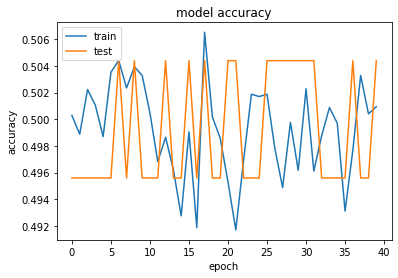

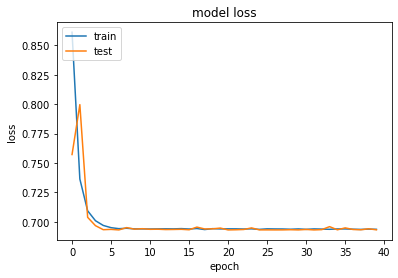

Ende des Versuchs: 


In [44]:
history=model.fit(XTrainingC,YTraining,
          validation_data=(XValC,Yval)
          ,batch_size=100,
            shuffle=True,
            class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 40)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

# PMT, dass aussieht wie LAPPD

120k Files

In [3]:
XL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PI_Pure_LAPPD(9x24)_23k_Files.pickle","rb"))
YL=pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PI_Pure_LAPPD(9x24)_23k_Files.pickle","rb"))


In [10]:
training_data = list(zip(XL, YL))
import random
random.shuffle(training_data)

for sample in training_data[:20]:
    print("Eintrag \n", sample[1])

X1 =[]
Y1 =[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    
    
XTraining = np.array(X1)
YTraining = np.array(Y1)

X2 =[]
Y2 =[]

for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    
    
XVal = np.array(X2)
Yval = np.array(Y2)

X3 =[]
Y3 =[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    
    
XTest = np.array(X3)
YTest = np.array(Y3)

print(XTraining.shape,XVal.shape,XTest.shape)

Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [0 1]
Eintrag 
 [1 0]
(85000, 3, 8, 2) (20000, 3, 8, 2) (15005, 3, 8, 2)


In [23]:
unique, counts = np.unique(YTest, return_counts=True, axis=0)
print("How much from one kind, how much from the other: \n",counts)
print("How do they look like? \n",unique)
print("Percentage of one kind: \n", 100/(counts[0]+counts[1])*counts[1])

How much from one kind, how much from the other: 
 [7542 7463]
How do they look like? 
 [[0 1]
 [1 0]]
Percentage of one kind: 
 49.73675441519494


In [11]:
XTrainingT= XTraining[:,:,:,1].reshape(17000,9,24,1)
XTestT = XTest[:,:,:,1].reshape(4052,9,24,1)
XValT = XVal[:,:,:,1].reshape(2500,9,24,1)
XTrainingC= XTraining[:,:,:,0].reshape(17000,9,24,1)
XTestC = XTest[:,:,:,0].reshape(4052,9,24,1)
XValC = XVal[:,:,:,0].reshape(2500,9,24,1)

ValueError: cannot reshape array of size 2040000 into shape (17000,9,24,1)

In [15]:
dense_layers = [0,1,2]
layer_sizes = [15,50,100,150]
conv_layers = [0,1,2,3]
kernal_size = [(2,2),(3,3),(4,4)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTsmall\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XL.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                #filepath="LAPPD_Charge_Only_batchnormed_PI_22k-improvement-val-acc_{val_acc:.2f}.model"  
                #checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                #model.summary()
                history=model.fit(XTraining,YTraining,
              validation_data=(XVal,Yval)
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            #checkpoint,
                            tensorboard 
                ],
              epochs= 30)
            

Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 7s 83us/sample - loss: 0.5815 - acc: 0.7127 - val_loss: 0.5033 - val_acc: 0.7552
Epoch 2/30
85000/85000 [==============================] - 5s 64us/sample - loss: 0.5126 - acc: 0.7488 - val_loss: 0.4834 - val_acc: 0.7666
Epoch 3/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.4986 - acc: 0.7575 - val_loss: 0.4672 - val_acc: 0.7793
Epoch 4/30
85000/85000 [==============================] - 5s 64us/sample - loss: 0.4870 - acc: 0.7656 - val_loss: 0.4563 - val_acc: 0.7832
Epoch 5/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.4793 - acc: 0.7708 - val_loss: 0.4519 - val_acc: 0.7868
Epoch 6/30
85000/85000 [==============================] - 6s 67us/sample - loss: 0.4732 - acc: 0.7746 - val_loss: 0.4621 - val_acc: 0.7766
Epoch 7/30
85000/85000 [==============================] - 6s 67us/sample - loss: 0.4694 - acc: 0.7769 - val_loss: 0.

Epoch 29/30
85000/85000 [==============================] - 5s 65us/sample - loss: 0.4480 - acc: 0.7911 - val_loss: 0.4333 - val_acc: 0.7964
Epoch 30/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.4494 - acc: 0.7893 - val_loss: 0.4258 - val_acc: 0.8053
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.5946 - acc: 0.6962 - val_loss: 0.5144 - val_acc: 0.7466
Epoch 2/30
85000/85000 [==============================] - 6s 75us/sample - loss: 0.5307 - acc: 0.7361 - val_loss: 0.4991 - val_acc: 0.7582
Epoch 3/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.5166 - acc: 0.7468 - val_loss: 0.4862 - val_acc: 0.7652
Epoch 4/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.5066 - acc: 0.7540 - val_loss: 0.4863 - val_acc: 0.7681
Epoch 5/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.4992 - acc: 0.7574 - val_loss: 

Epoch 27/30
85000/85000 [==============================] - 7s 82us/sample - loss: 0.4695 - acc: 0.7779 - val_loss: 0.4509 - val_acc: 0.7921
Epoch 28/30
85000/85000 [==============================] - 7s 82us/sample - loss: 0.4675 - acc: 0.7791 - val_loss: 0.4318 - val_acc: 0.8003
Epoch 29/30
85000/85000 [==============================] - 7s 82us/sample - loss: 0.4693 - acc: 0.7776 - val_loss: 0.4398 - val_acc: 0.7959
Epoch 30/30
85000/85000 [==============================] - 7s 81us/sample - loss: 0.4692 - acc: 0.7790 - val_loss: 0.4381 - val_acc: 0.7963
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.5401 - acc: 0.7356 - val_loss: 0.4743 - val_acc: 0.7725
Epoch 2/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4825 - acc: 0.7676 - val_loss: 0.4637 - val_acc: 0.7814
Epoch 3/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4686 - acc: 0.7761 - val_loss

Epoch 25/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4176 - acc: 0.8075 - val_loss: 0.4174 - val_acc: 0.8030
Epoch 26/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4173 - acc: 0.8077 - val_loss: 0.3992 - val_acc: 0.8166
Epoch 27/30
85000/85000 [==============================] - 5s 64us/sample - loss: 0.4167 - acc: 0.8089 - val_loss: 0.4182 - val_acc: 0.8086
Epoch 28/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4154 - acc: 0.8106 - val_loss: 0.3982 - val_acc: 0.8183
Epoch 29/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4179 - acc: 0.8066 - val_loss: 0.3975 - val_acc: 0.8170
Epoch 30/30
85000/85000 [==============================] - 5s 64us/sample - loss: 0.4148 - acc: 0.8097 - val_loss: 0.4005 - val_acc: 0.8166
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 8s 99us/sample - loss: 0.5590 - acc: 0.7276 - val_lo

Epoch 23/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4133 - acc: 0.8089 - val_loss: 0.3938 - val_acc: 0.8170
Epoch 24/30
85000/85000 [==============================] - 7s 85us/sample - loss: 0.4145 - acc: 0.8102 - val_loss: 0.3949 - val_acc: 0.8239
Epoch 25/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4133 - acc: 0.8108 - val_loss: 0.3899 - val_acc: 0.8212
Epoch 26/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4108 - acc: 0.8121 - val_loss: 0.3971 - val_acc: 0.8174
Epoch 27/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4112 - acc: 0.8123 - val_loss: 0.3946 - val_acc: 0.8182
Epoch 28/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4088 - acc: 0.8152 - val_loss: 0.3913 - val_acc: 0.8247
Epoch 29/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4110 - acc: 0.8118 - val_loss: 0.3864 - val_acc: 0.8245
Epoch 30/30
85000/85

Epoch 21/30
85000/85000 [==============================] - 5s 65us/sample - loss: 0.4056 - acc: 0.8145 - val_loss: 0.3937 - val_acc: 0.8194
Epoch 22/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.4031 - acc: 0.8157 - val_loss: 0.4229 - val_acc: 0.8035
Epoch 23/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.4035 - acc: 0.8162 - val_loss: 0.3929 - val_acc: 0.8245
Epoch 24/30
85000/85000 [==============================] - 6s 66us/sample - loss: 0.4016 - acc: 0.8171 - val_loss: 0.3904 - val_acc: 0.8202
Epoch 25/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.3999 - acc: 0.8179 - val_loss: 0.3894 - val_acc: 0.8217
Epoch 26/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.4001 - acc: 0.8175 - val_loss: 0.4023 - val_acc: 0.8146
Epoch 27/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.3998 - acc: 0.8173 - val_loss: 0.4003 - val_acc: 0.8159
Epoch 28/30
85000/85

Epoch 19/30
85000/85000 [==============================] - 7s 87us/sample - loss: 0.3901 - acc: 0.8233 - val_loss: 0.3882 - val_acc: 0.8228
Epoch 20/30
85000/85000 [==============================] - 7s 87us/sample - loss: 0.3893 - acc: 0.8244 - val_loss: 0.3927 - val_acc: 0.8224
Epoch 21/30
85000/85000 [==============================] - 7s 87us/sample - loss: 0.3873 - acc: 0.8251 - val_loss: 0.3731 - val_acc: 0.8304
Epoch 22/30
85000/85000 [==============================] - 7s 87us/sample - loss: 0.3853 - acc: 0.8253 - val_loss: 0.3860 - val_acc: 0.8207
Epoch 23/30
85000/85000 [==============================] - 7s 88us/sample - loss: 0.3854 - acc: 0.8260 - val_loss: 0.3781 - val_acc: 0.8275
Epoch 24/30
85000/85000 [==============================] - 7s 88us/sample - loss: 0.3816 - acc: 0.8289 - val_loss: 0.3751 - val_acc: 0.8303
Epoch 25/30
85000/85000 [==============================] - 7s 88us/sample - loss: 0.3830 - acc: 0.8281 - val_loss: 0.3868 - val_acc: 0.8210
Epoch 26/30
85000/85

Epoch 17/30
85000/85000 [==============================] - 6s 68us/sample - loss: 0.4012 - acc: 0.8178 - val_loss: 0.3975 - val_acc: 0.8181
Epoch 18/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.3988 - acc: 0.8187 - val_loss: 0.3896 - val_acc: 0.8246
Epoch 19/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.3981 - acc: 0.8196 - val_loss: 0.3953 - val_acc: 0.8192
Epoch 20/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.3976 - acc: 0.8174 - val_loss: 0.3972 - val_acc: 0.8202
Epoch 21/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.3964 - acc: 0.8186 - val_loss: 0.4023 - val_acc: 0.8144
Epoch 22/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.3972 - acc: 0.8192 - val_loss: 0.3864 - val_acc: 0.8260
Epoch 23/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.3970 - acc: 0.8175 - val_loss: 0.3926 - val_acc: 0.8231
Epoch 24/30
85000/85

Epoch 15/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3830 - acc: 0.8281 - val_loss: 0.3846 - val_acc: 0.8235
Epoch 16/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3809 - acc: 0.8274 - val_loss: 0.3758 - val_acc: 0.8304
Epoch 17/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3775 - acc: 0.8293 - val_loss: 0.3894 - val_acc: 0.8235
Epoch 18/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3787 - acc: 0.8300 - val_loss: 0.3930 - val_acc: 0.8202
Epoch 19/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3767 - acc: 0.8309 - val_loss: 0.3764 - val_acc: 0.8309
Epoch 20/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3734 - acc: 0.8320 - val_loss: 0.3709 - val_acc: 0.8307
Epoch 21/30
85000/85000 [==============================] - 8s 91us/sample - loss: 0.3716 - acc: 0.8340 - val_loss: 0.3743 - val_acc: 0.8300
Epoch 22/30
85000/85

Epoch 13/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.4667 - acc: 0.7789 - val_loss: 0.4387 - val_acc: 0.7957
Epoch 14/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.4648 - acc: 0.7810 - val_loss: 0.4367 - val_acc: 0.7936
Epoch 15/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.4642 - acc: 0.7794 - val_loss: 0.4398 - val_acc: 0.7937
Epoch 16/30
85000/85000 [==============================] - 6s 70us/sample - loss: 0.4630 - acc: 0.7813 - val_loss: 0.4386 - val_acc: 0.7984
Epoch 17/30
85000/85000 [==============================] - 6s 68us/sample - loss: 0.4615 - acc: 0.7827 - val_loss: 0.4390 - val_acc: 0.7972
Epoch 18/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.4622 - acc: 0.7816 - val_loss: 0.4379 - val_acc: 0.7975
Epoch 19/30
85000/85000 [==============================] - 6s 69us/sample - loss: 0.4626 - acc: 0.7804 - val_loss: 0.4341 - val_acc: 0.7983
Epoch 20/30
85000/85

Epoch 11/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4864 - acc: 0.7686 - val_loss: 0.4541 - val_acc: 0.7887
Epoch 12/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4832 - acc: 0.7702 - val_loss: 0.4471 - val_acc: 0.7942
Epoch 13/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4800 - acc: 0.7709 - val_loss: 0.4464 - val_acc: 0.7908
Epoch 14/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4790 - acc: 0.7734 - val_loss: 0.4456 - val_acc: 0.7966
Epoch 15/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4776 - acc: 0.7736 - val_loss: 0.4447 - val_acc: 0.7955
Epoch 16/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4789 - acc: 0.7716 - val_loss: 0.4411 - val_acc: 0.7921
Epoch 17/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.4771 - acc: 0.7741 - val_loss: 0.4425 - val_acc: 0.7914
Epoch 18/30
85000/85

Epoch 9/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.4349 - acc: 0.7979 - val_loss: 0.4314 - val_acc: 0.7965
Epoch 10/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4313 - acc: 0.7996 - val_loss: 0.4157 - val_acc: 0.8059
Epoch 11/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4300 - acc: 0.8012 - val_loss: 0.4165 - val_acc: 0.8064
Epoch 12/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.4273 - acc: 0.8022 - val_loss: 0.4111 - val_acc: 0.8077
Epoch 13/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4285 - acc: 0.8027 - val_loss: 0.4088 - val_acc: 0.8105
Epoch 14/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4252 - acc: 0.8027 - val_loss: 0.4158 - val_acc: 0.8092
Epoch 15/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.4237 - acc: 0.8041 - val_loss: 0.4098 - val_acc: 0.8098
Epoch 16/30
85000/850

Epoch 7/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.4431 - acc: 0.7938 - val_loss: 0.4222 - val_acc: 0.8045
Epoch 8/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.4397 - acc: 0.7953 - val_loss: 0.4215 - val_acc: 0.8030
Epoch 9/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.4353 - acc: 0.7982 - val_loss: 0.4086 - val_acc: 0.8120
Epoch 10/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.4339 - acc: 0.7993 - val_loss: 0.4208 - val_acc: 0.8026
Epoch 11/30
85000/85000 [==============================] - 8s 93us/sample - loss: 0.4299 - acc: 0.8011 - val_loss: 0.4035 - val_acc: 0.8158
Epoch 12/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.4299 - acc: 0.8002 - val_loss: 0.4044 - val_acc: 0.8108
Epoch 13/30
85000/85000 [==============================] - 8s 93us/sample - loss: 0.4251 - acc: 0.8044 - val_loss: 0.4158 - val_acc: 0.8083
Epoch 14/30
85000/85000

Epoch 5/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4386 - acc: 0.7966 - val_loss: 0.4411 - val_acc: 0.7930
Epoch 6/30
85000/85000 [==============================] - 7s 83us/sample - loss: 0.4321 - acc: 0.8001 - val_loss: 0.4130 - val_acc: 0.8097
Epoch 7/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4288 - acc: 0.8021 - val_loss: 0.4106 - val_acc: 0.8105
Epoch 8/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4245 - acc: 0.8037 - val_loss: 0.4201 - val_acc: 0.8061
Epoch 9/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4231 - acc: 0.8053 - val_loss: 0.4115 - val_acc: 0.8084
Epoch 10/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4211 - acc: 0.8062 - val_loss: 0.3976 - val_acc: 0.8194
Epoch 11/30
85000/85000 [==============================] - 7s 84us/sample - loss: 0.4172 - acc: 0.8081 - val_loss: 0.4095 - val_acc: 0.8097
Epoch 12/30
85000/85000 [

Epoch 3/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.4514 - acc: 0.7894 - val_loss: 0.4213 - val_acc: 0.8054
Epoch 4/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.4400 - acc: 0.7952 - val_loss: 0.4089 - val_acc: 0.8117
Epoch 5/30
85000/85000 [==============================] - 8s 100us/sample - loss: 0.4285 - acc: 0.8034 - val_loss: 0.4112 - val_acc: 0.8088
Epoch 6/30
85000/85000 [==============================] - 9s 100us/sample - loss: 0.4230 - acc: 0.8052 - val_loss: 0.4004 - val_acc: 0.8175
Epoch 7/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.4169 - acc: 0.8086 - val_loss: 0.3969 - val_acc: 0.8170
Epoch 8/30
85000/85000 [==============================] - 8s 98us/sample - loss: 0.4139 - acc: 0.8107 - val_loss: 0.3985 - val_acc: 0.8134
Epoch 9/30
85000/85000 [==============================] - 8s 98us/sample - loss: 0.4089 - acc: 0.8132 - val_loss: 0.3922 - val_acc: 0.8205
Epoch 10/30
85000/85000 [

Epoch 1/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.5241 - acc: 0.7454 - val_loss: 0.4647 - val_acc: 0.7796
Epoch 2/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.4684 - acc: 0.7776 - val_loss: 0.4421 - val_acc: 0.7929
Epoch 3/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.4504 - acc: 0.7879 - val_loss: 0.4938 - val_acc: 0.7603
Epoch 4/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.4399 - acc: 0.7953 - val_loss: 0.4288 - val_acc: 0.7993
Epoch 5/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.4319 - acc: 0.7982 - val_loss: 0.4201 - val_acc: 0.8044
Epoch 6/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.4269 - acc: 0.8020 - val_loss: 0.4231 - val_acc: 0.8065
Epoch 7/30
85000/85000 [==============================] - 7s 79us/sample - loss: 0.4238 - acc: 0.8046 - val_loss: 0.4082 - val_acc: 0.8123
Epoch 8/30
85000/85000 [=

Epoch 27/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.4176 - acc: 0.8076 - val_loss: 0.4137 - val_acc: 0.8092
Epoch 28/30
85000/85000 [==============================] - 8s 98us/sample - loss: 0.4155 - acc: 0.8085 - val_loss: 0.4183 - val_acc: 0.8059
Epoch 29/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.4136 - acc: 0.8099 - val_loss: 0.4173 - val_acc: 0.8058
Epoch 30/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.4143 - acc: 0.8098 - val_loss: 0.4075 - val_acc: 0.8117
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 12s 143us/sample - loss: 0.5475 - acc: 0.7294 - val_loss: 0.4907 - val_acc: 0.7612
Epoch 2/30
85000/85000 [==============================] - 8s 98us/sample - loss: 0.4945 - acc: 0.7613 - val_loss: 0.4592 - val_acc: 0.7838
Epoch 3/30
85000/85000 [==============================] - 8s 98us/sample - loss: 0.4759 - acc: 0.7727 - val_lo

Epoch 25/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4589 - acc: 0.7844 - val_loss: 0.4259 - val_acc: 0.8041
Epoch 26/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4566 - acc: 0.7844 - val_loss: 0.4310 - val_acc: 0.7995
Epoch 27/30
85000/85000 [==============================] - 9s 110us/sample - loss: 0.4569 - acc: 0.7865 - val_loss: 0.4239 - val_acc: 0.8025
Epoch 28/30
85000/85000 [==============================] - 9s 110us/sample - loss: 0.4567 - acc: 0.7844 - val_loss: 0.4218 - val_acc: 0.8064
Epoch 29/30
85000/85000 [==============================] - 9s 110us/sample - loss: 0.4568 - acc: 0.7847 - val_loss: 0.4230 - val_acc: 0.8077
Epoch 30/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4567 - acc: 0.7844 - val_loss: 0.4223 - val_acc: 0.8069
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.6025 - acc: 0.6929 

85000/85000 [==============================] - 10s 112us/sample - loss: 0.4096 - acc: 0.8123 - val_loss: 0.3845 - val_acc: 0.8237
Epoch 20/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.4075 - acc: 0.8144 - val_loss: 0.3941 - val_acc: 0.8197
Epoch 21/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.4075 - acc: 0.8138 - val_loss: 0.4278 - val_acc: 0.8022
Epoch 22/30
85000/85000 [==============================] - 10s 113us/sample - loss: 0.4068 - acc: 0.8142 - val_loss: 0.3936 - val_acc: 0.8188
Epoch 23/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.4058 - acc: 0.8147 - val_loss: 0.3838 - val_acc: 0.8263
Epoch 24/30
85000/85000 [==============================] - 10s 113us/sample - loss: 0.4047 - acc: 0.8159 - val_loss: 0.3981 - val_acc: 0.8160
Epoch 25/30
85000/85000 [==============================] - 10s 113us/sample - loss: 0.4026 - acc: 0.8155 - val_loss: 0.4026 - val_acc: 0.8139
Epoch 26/30
85000/

85000/85000 [==============================] - 10s 116us/sample - loss: 0.3932 - acc: 0.8206 - val_loss: 0.3818 - val_acc: 0.8277
Epoch 14/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.3908 - acc: 0.8232 - val_loss: 0.3865 - val_acc: 0.8242
Epoch 15/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.3896 - acc: 0.8231 - val_loss: 0.3902 - val_acc: 0.8200
Epoch 16/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.3866 - acc: 0.8247 - val_loss: 0.3773 - val_acc: 0.8299
Epoch 17/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.3857 - acc: 0.8245 - val_loss: 0.3794 - val_acc: 0.8284
Epoch 18/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.3846 - acc: 0.8254 - val_loss: 0.3897 - val_acc: 0.8195
Epoch 19/30
85000/85000 [==============================] - 10s 117us/sample - loss: 0.3821 - acc: 0.8273 - val_loss: 0.3721 - val_acc: 0.8323
Epoch 20/30
85000/

85000/85000 [==============================] - 10s 121us/sample - loss: 0.4043 - acc: 0.8153 - val_loss: 0.3891 - val_acc: 0.8246
Epoch 8/30
85000/85000 [==============================] - 10s 121us/sample - loss: 0.3991 - acc: 0.8179 - val_loss: 0.3867 - val_acc: 0.8219
Epoch 9/30
85000/85000 [==============================] - 10s 119us/sample - loss: 0.3951 - acc: 0.8200 - val_loss: 0.3907 - val_acc: 0.8191
Epoch 10/30
85000/85000 [==============================] - 10s 122us/sample - loss: 0.3927 - acc: 0.8214 - val_loss: 0.3812 - val_acc: 0.8270
Epoch 11/30
85000/85000 [==============================] - 10s 120us/sample - loss: 0.3879 - acc: 0.8234 - val_loss: 0.3882 - val_acc: 0.8227
Epoch 12/30
85000/85000 [==============================] - 10s 120us/sample - loss: 0.3857 - acc: 0.8250 - val_loss: 0.3852 - val_acc: 0.8242
Epoch 13/30
85000/85000 [==============================] - 10s 121us/sample - loss: 0.3840 - acc: 0.8251 - val_loss: 0.3975 - val_acc: 0.8195
Epoch 14/30
85000/85

Epoch 2/30
85000/85000 [==============================] - 9s 106us/sample - loss: 0.5109 - acc: 0.7526 - val_loss: 0.4763 - val_acc: 0.7721
Epoch 3/30
85000/85000 [==============================] - 9s 106us/sample - loss: 0.4928 - acc: 0.7634 - val_loss: 0.4664 - val_acc: 0.7786
Epoch 4/30
85000/85000 [==============================] - 9s 106us/sample - loss: 0.4849 - acc: 0.7672 - val_loss: 0.4576 - val_acc: 0.7847
Epoch 5/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4775 - acc: 0.7724 - val_loss: 0.4489 - val_acc: 0.7878
Epoch 6/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4690 - acc: 0.7779 - val_loss: 0.4440 - val_acc: 0.7925
Epoch 7/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4624 - acc: 0.7809 - val_loss: 0.4384 - val_acc: 0.7964
Epoch 8/30
85000/85000 [==============================] - 9s 106us/sample - loss: 0.4614 - acc: 0.7819 - val_loss: 0.4512 - val_acc: 0.7908
Epoch 9/30
85000/850

Epoch 27/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3983 - acc: 0.8194 - val_loss: 0.3855 - val_acc: 0.8232
Epoch 28/30
85000/85000 [==============================] - 8s 93us/sample - loss: 0.3970 - acc: 0.8190 - val_loss: 0.3868 - val_acc: 0.8251
Epoch 29/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.3964 - acc: 0.8204 - val_loss: 0.3889 - val_acc: 0.8243
Epoch 30/30
85000/85000 [==============================] - 8s 95us/sample - loss: 0.3964 - acc: 0.8214 - val_loss: 0.3867 - val_acc: 0.8236
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 16s 188us/sample - loss: 0.5539 - acc: 0.7324 - val_loss: 0.4758 - val_acc: 0.7753
Epoch 2/30
85000/85000 [==============================] - 10s 115us/sample - loss: 0.4762 - acc: 0.7731 - val_loss: 0.5029 - val_acc: 0.7511
Epoch 3/30
85000/85000 [==============================] - 9s 111us/sample - loss: 0.4552 - acc: 0.7864 - val

Epoch 22/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.3825 - acc: 0.8284 - val_loss: 0.3830 - val_acc: 0.8261
Epoch 23/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.3838 - acc: 0.8270 - val_loss: 0.3974 - val_acc: 0.8177
Epoch 24/30
85000/85000 [==============================] - 8s 96us/sample - loss: 0.3826 - acc: 0.8262 - val_loss: 0.3858 - val_acc: 0.8242
Epoch 25/30
85000/85000 [==============================] - 8s 96us/sample - loss: 0.3800 - acc: 0.8299 - val_loss: 0.3818 - val_acc: 0.8267
Epoch 26/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.3792 - acc: 0.8286 - val_loss: 0.3851 - val_acc: 0.8254
Epoch 27/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.3806 - acc: 0.8293 - val_loss: 0.3813 - val_acc: 0.8273
Epoch 28/30
85000/85000 [==============================] - 8s 97us/sample - loss: 0.3792 - acc: 0.8304 - val_loss: 0.3794 - val_acc: 0.8280
Epoch 29/30
85000/85

85000/85000 [==============================] - 9s 101us/sample - loss: 0.3840 - acc: 0.8271 - val_loss: 0.3892 - val_acc: 0.8228
Epoch 17/30
85000/85000 [==============================] - 9s 103us/sample - loss: 0.3805 - acc: 0.8295 - val_loss: 0.4015 - val_acc: 0.8163
Epoch 18/30
85000/85000 [==============================] - 9s 102us/sample - loss: 0.3797 - acc: 0.8297 - val_loss: 0.3901 - val_acc: 0.8231
Epoch 19/30
85000/85000 [==============================] - 9s 103us/sample - loss: 0.3795 - acc: 0.8289 - val_loss: 0.3799 - val_acc: 0.8291
Epoch 20/30
85000/85000 [==============================] - 9s 101us/sample - loss: 0.3753 - acc: 0.8324 - val_loss: 0.3797 - val_acc: 0.8278
Epoch 21/30
85000/85000 [==============================] - 9s 101us/sample - loss: 0.3742 - acc: 0.8303 - val_loss: 0.3785 - val_acc: 0.8314
Epoch 22/30
85000/85000 [==============================] - 9s 101us/sample - loss: 0.3736 - acc: 0.8326 - val_loss: 0.3856 - val_acc: 0.8266
Epoch 23/30
85000/85000 [

85000/85000 [==============================] - 9s 102us/sample - loss: 0.4459 - acc: 0.7912 - val_loss: 0.4364 - val_acc: 0.7940
Epoch 11/30
85000/85000 [==============================] - 9s 102us/sample - loss: 0.4453 - acc: 0.7918 - val_loss: 0.4414 - val_acc: 0.7910
Epoch 12/30
85000/85000 [==============================] - 9s 102us/sample - loss: 0.4446 - acc: 0.7919 - val_loss: 0.4236 - val_acc: 0.8037
Epoch 13/30
85000/85000 [==============================] - 9s 102us/sample - loss: 0.4438 - acc: 0.7935 - val_loss: 0.4192 - val_acc: 0.8032
Epoch 14/30
85000/85000 [==============================] - 9s 102us/sample - loss: 0.4418 - acc: 0.7947 - val_loss: 0.4216 - val_acc: 0.8037
Epoch 15/30
85000/85000 [==============================] - 9s 101us/sample - loss: 0.4397 - acc: 0.7962 - val_loss: 0.4233 - val_acc: 0.8019
Epoch 16/30
85000/85000 [==============================] - 9s 102us/sample - loss: 0.4394 - acc: 0.7958 - val_loss: 0.4205 - val_acc: 0.8037
Epoch 17/30
85000/85000 [

85000/85000 [==============================] - 9s 107us/sample - loss: 0.4453 - acc: 0.7924 - val_loss: 0.4467 - val_acc: 0.7877
Epoch 5/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4374 - acc: 0.7964 - val_loss: 0.4171 - val_acc: 0.8067
Epoch 6/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4306 - acc: 0.8007 - val_loss: 0.4471 - val_acc: 0.7940
Epoch 7/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4252 - acc: 0.8042 - val_loss: 0.4168 - val_acc: 0.8105
Epoch 8/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4206 - acc: 0.8059 - val_loss: 0.4072 - val_acc: 0.8127
Epoch 9/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4177 - acc: 0.8094 - val_loss: 0.3999 - val_acc: 0.8160
Epoch 10/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4157 - acc: 0.8100 - val_loss: 0.4698 - val_acc: 0.7764
Epoch 11/30
85000/85000 [=====

Epoch 29/30
85000/85000 [==============================] - 9s 108us/sample - loss: 0.3746 - acc: 0.8321 - val_loss: 0.3806 - val_acc: 0.8260
Epoch 30/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.3728 - acc: 0.8322 - val_loss: 0.3824 - val_acc: 0.8267
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 17s 199us/sample - loss: 0.5298 - acc: 0.7446 - val_loss: 0.4628 - val_acc: 0.7827
Epoch 2/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4661 - acc: 0.7790 - val_loss: 0.4482 - val_acc: 0.7890
Epoch 3/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4470 - acc: 0.7905 - val_loss: 0.4369 - val_acc: 0.7982
Epoch 4/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4355 - acc: 0.7972 - val_loss: 0.4310 - val_acc: 0.8020
Epoch 5/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.4268 - acc: 0.8031 - va

85000/85000 [==============================] - 10s 112us/sample - loss: 0.3729 - acc: 0.8337 - val_loss: 0.3809 - val_acc: 0.8284
Epoch 24/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.3714 - acc: 0.8329 - val_loss: 0.3884 - val_acc: 0.8241
Epoch 25/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.3708 - acc: 0.8341 - val_loss: 0.3885 - val_acc: 0.8220
Epoch 26/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.3720 - acc: 0.8334 - val_loss: 0.3881 - val_acc: 0.8260
Epoch 27/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.3695 - acc: 0.8336 - val_loss: 0.3839 - val_acc: 0.8258
Epoch 28/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.3691 - acc: 0.8338 - val_loss: 0.3738 - val_acc: 0.8321
Epoch 29/30
85000/85000 [==============================] - 10s 113us/sample - loss: 0.3674 - acc: 0.8350 - val_loss: 0.3742 - val_acc: 0.8306
Epoch 30/30
85000/

85000/85000 [==============================] - 12s 139us/sample - loss: 0.4157 - acc: 0.8085 - val_loss: 0.4134 - val_acc: 0.8079
Epoch 18/30
85000/85000 [==============================] - 12s 138us/sample - loss: 0.4168 - acc: 0.8079 - val_loss: 0.4170 - val_acc: 0.8090
Epoch 19/30
85000/85000 [==============================] - 12s 137us/sample - loss: 0.4142 - acc: 0.8096 - val_loss: 0.4212 - val_acc: 0.8084
Epoch 20/30
85000/85000 [==============================] - 12s 138us/sample - loss: 0.4122 - acc: 0.8108 - val_loss: 0.4037 - val_acc: 0.8166
Epoch 21/30
85000/85000 [==============================] - 12s 138us/sample - loss: 0.4126 - acc: 0.8108 - val_loss: 0.4054 - val_acc: 0.8150
Epoch 22/30
85000/85000 [==============================] - 12s 138us/sample - loss: 0.4104 - acc: 0.8114 - val_loss: 0.4061 - val_acc: 0.8145
Epoch 23/30
85000/85000 [==============================] - 12s 137us/sample - loss: 0.4083 - acc: 0.8129 - val_loss: 0.3989 - val_acc: 0.8177
Epoch 24/30
85000/

85000/85000 [==============================] - 12s 141us/sample - loss: 0.3918 - acc: 0.8220 - val_loss: 0.3876 - val_acc: 0.8225
Epoch 12/30
85000/85000 [==============================] - 12s 142us/sample - loss: 0.3892 - acc: 0.8231 - val_loss: 0.4054 - val_acc: 0.8133
Epoch 13/30
85000/85000 [==============================] - 12s 142us/sample - loss: 0.3846 - acc: 0.8257 - val_loss: 0.4032 - val_acc: 0.8139
Epoch 14/30
85000/85000 [==============================] - 12s 141us/sample - loss: 0.3814 - acc: 0.8273 - val_loss: 0.3897 - val_acc: 0.8221
Epoch 15/30
85000/85000 [==============================] - 12s 141us/sample - loss: 0.3752 - acc: 0.8311 - val_loss: 0.4145 - val_acc: 0.8133
Epoch 16/30
85000/85000 [==============================] - 12s 141us/sample - loss: 0.3746 - acc: 0.8320 - val_loss: 0.3919 - val_acc: 0.8222
Epoch 17/30
85000/85000 [==============================] - 12s 142us/sample - loss: 0.3720 - acc: 0.8323 - val_loss: 0.3910 - val_acc: 0.8220
Epoch 18/30
85000/

85000/85000 [==============================] - 12s 145us/sample - loss: 0.4101 - acc: 0.8121 - val_loss: 0.4146 - val_acc: 0.8084
Epoch 6/30
85000/85000 [==============================] - 12s 145us/sample - loss: 0.4034 - acc: 0.8170 - val_loss: 0.3968 - val_acc: 0.8195
Epoch 7/30
85000/85000 [==============================] - 12s 144us/sample - loss: 0.3974 - acc: 0.8201 - val_loss: 0.3928 - val_acc: 0.8210
Epoch 8/30
85000/85000 [==============================] - 12s 144us/sample - loss: 0.3897 - acc: 0.8239 - val_loss: 0.4043 - val_acc: 0.8137
Epoch 9/30
85000/85000 [==============================] - 12s 145us/sample - loss: 0.3852 - acc: 0.8266 - val_loss: 0.4058 - val_acc: 0.8138
Epoch 10/30
85000/85000 [==============================] - 12s 145us/sample - loss: 0.3798 - acc: 0.8292 - val_loss: 0.3904 - val_acc: 0.8220
Epoch 11/30
85000/85000 [==============================] - 12s 145us/sample - loss: 0.3758 - acc: 0.8309 - val_loss: 0.3995 - val_acc: 0.8167
Epoch 12/30
85000/8500

85000/85000 [==============================] - 14s 163us/sample - loss: 0.3273 - acc: 0.8557 - val_loss: 0.3826 - val_acc: 0.8289
Epoch 30/30
85000/85000 [==============================] - 14s 164us/sample - loss: 0.3277 - acc: 0.8555 - val_loss: 0.3789 - val_acc: 0.8339
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 24s 277us/sample - loss: 0.5120 - acc: 0.7531 - val_loss: 0.4602 - val_acc: 0.7806
Epoch 2/30
85000/85000 [==============================] - 13s 149us/sample - loss: 0.4480 - acc: 0.7902 - val_loss: 0.4251 - val_acc: 0.8037
Epoch 3/30
85000/85000 [==============================] - 13s 149us/sample - loss: 0.4291 - acc: 0.8021 - val_loss: 0.4255 - val_acc: 0.8026
Epoch 4/30
85000/85000 [==============================] - 13s 149us/sample - loss: 0.4164 - acc: 0.8079 - val_loss: 0.4196 - val_acc: 0.8072
Epoch 5/30
85000/85000 [==============================] - 13s 149us/sample - loss: 0.4092 - acc: 0.8126 - val_loss

85000/85000 [==============================] - 14s 168us/sample - loss: 0.3101 - acc: 0.8629 - val_loss: 0.3994 - val_acc: 0.8309
Epoch 24/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.3061 - acc: 0.8667 - val_loss: 0.4026 - val_acc: 0.8212
Epoch 25/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.3025 - acc: 0.8686 - val_loss: 0.3943 - val_acc: 0.8295
Epoch 26/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.3005 - acc: 0.8693 - val_loss: 0.3942 - val_acc: 0.8268
Epoch 27/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.2984 - acc: 0.8699 - val_loss: 0.4029 - val_acc: 0.8302
Epoch 28/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.2919 - acc: 0.8725 - val_loss: 0.4178 - val_acc: 0.8237
Epoch 29/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.2924 - acc: 0.8726 - val_loss: 0.4157 - val_acc: 0.8127
Epoch 30/30
85000/

85000/85000 [==============================] - 13s 153us/sample - loss: 0.4386 - acc: 0.7971 - val_loss: 0.4224 - val_acc: 0.8063
Epoch 18/30
85000/85000 [==============================] - 13s 154us/sample - loss: 0.4374 - acc: 0.7979 - val_loss: 0.4150 - val_acc: 0.8080
Epoch 19/30
85000/85000 [==============================] - 13s 153us/sample - loss: 0.4369 - acc: 0.7984 - val_loss: 0.4222 - val_acc: 0.8032
Epoch 20/30
85000/85000 [==============================] - 13s 154us/sample - loss: 0.4378 - acc: 0.7985 - val_loss: 0.4255 - val_acc: 0.8057
Epoch 21/30
85000/85000 [==============================] - 13s 153us/sample - loss: 0.4339 - acc: 0.7999 - val_loss: 0.4160 - val_acc: 0.8094
Epoch 22/30
85000/85000 [==============================] - 13s 153us/sample - loss: 0.4334 - acc: 0.8000 - val_loss: 0.4191 - val_acc: 0.8056
Epoch 23/30
85000/85000 [==============================] - 13s 153us/sample - loss: 0.4325 - acc: 0.8004 - val_loss: 0.4107 - val_acc: 0.8072
Epoch 24/30
85000/

85000/85000 [==============================] - 13s 158us/sample - loss: 0.3987 - acc: 0.8194 - val_loss: 0.3901 - val_acc: 0.8228
Epoch 12/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.3938 - acc: 0.8226 - val_loss: 0.4015 - val_acc: 0.8191
Epoch 13/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.3924 - acc: 0.8228 - val_loss: 0.3892 - val_acc: 0.8224
Epoch 14/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.3910 - acc: 0.8230 - val_loss: 0.4011 - val_acc: 0.8163
Epoch 15/30
85000/85000 [==============================] - 13s 157us/sample - loss: 0.3874 - acc: 0.8246 - val_loss: 0.3878 - val_acc: 0.8195
Epoch 16/30
85000/85000 [==============================] - 13s 157us/sample - loss: 0.3849 - acc: 0.8268 - val_loss: 0.3872 - val_acc: 0.8238
Epoch 17/30
85000/85000 [==============================] - 13s 157us/sample - loss: 0.3844 - acc: 0.8265 - val_loss: 0.4110 - val_acc: 0.8108
Epoch 18/30
85000/

85000/85000 [==============================] - 14s 165us/sample - loss: 0.4133 - acc: 0.8122 - val_loss: 0.4333 - val_acc: 0.8017
Epoch 6/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.4036 - acc: 0.8161 - val_loss: 0.4044 - val_acc: 0.8130
Epoch 7/30
85000/85000 [==============================] - 14s 161us/sample - loss: 0.3983 - acc: 0.8196 - val_loss: 0.3944 - val_acc: 0.8213
Epoch 8/30
85000/85000 [==============================] - 14s 161us/sample - loss: 0.3907 - acc: 0.8227 - val_loss: 0.3905 - val_acc: 0.8249
Epoch 9/30
85000/85000 [==============================] - 14s 162us/sample - loss: 0.3844 - acc: 0.8282 - val_loss: 0.3860 - val_acc: 0.8251
Epoch 10/30
85000/85000 [==============================] - 14s 162us/sample - loss: 0.3807 - acc: 0.8293 - val_loss: 0.3846 - val_acc: 0.8265
Epoch 11/30
85000/85000 [==============================] - 14s 162us/sample - loss: 0.3758 - acc: 0.8318 - val_loss: 0.3777 - val_acc: 0.8273
Epoch 12/30
85000/8500

85000/85000 [==============================] - 13s 156us/sample - loss: 0.2798 - acc: 0.8790 - val_loss: 0.4166 - val_acc: 0.8184
Epoch 30/30
85000/85000 [==============================] - 13s 156us/sample - loss: 0.2781 - acc: 0.8792 - val_loss: 0.4122 - val_acc: 0.8249
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 28s 331us/sample - loss: 0.5186 - acc: 0.7526 - val_loss: 0.4805 - val_acc: 0.7690
Epoch 2/30
85000/85000 [==============================] - 14s 166us/sample - loss: 0.4500 - acc: 0.7912 - val_loss: 0.4238 - val_acc: 0.8020
Epoch 3/30
85000/85000 [==============================] - 14s 167us/sample - loss: 0.4278 - acc: 0.8033 - val_loss: 0.4674 - val_acc: 0.7857
Epoch 4/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.4145 - acc: 0.8118 - val_loss: 0.4152 - val_acc: 0.8105
Epoch 5/30
85000/85000 [==============================] - 14s 168us/sample - loss: 0.4040 - acc: 0.8158 - val_loss

85000/85000 [==============================] - 13s 157us/sample - loss: 0.4276 - acc: 0.8020 - val_loss: 0.4115 - val_acc: 0.8088
Epoch 24/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.4284 - acc: 0.8034 - val_loss: 0.4047 - val_acc: 0.8152
Epoch 25/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.4273 - acc: 0.8028 - val_loss: 0.4042 - val_acc: 0.8137
Epoch 26/30
85000/85000 [==============================] - 13s 157us/sample - loss: 0.4271 - acc: 0.8045 - val_loss: 0.4085 - val_acc: 0.8122
Epoch 27/30
85000/85000 [==============================] - 13s 157us/sample - loss: 0.4271 - acc: 0.8032 - val_loss: 0.4036 - val_acc: 0.8146
Epoch 28/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.4256 - acc: 0.8041 - val_loss: 0.4102 - val_acc: 0.8125
Epoch 29/30
85000/85000 [==============================] - 13s 158us/sample - loss: 0.4258 - acc: 0.8038 - val_loss: 0.4029 - val_acc: 0.8160
Epoch 30/30
85000/

85000/85000 [==============================] - 14s 163us/sample - loss: 0.3864 - acc: 0.8249 - val_loss: 0.3991 - val_acc: 0.8199
Epoch 18/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3835 - acc: 0.8271 - val_loss: 0.3932 - val_acc: 0.8178
Epoch 19/30
85000/85000 [==============================] - 14s 161us/sample - loss: 0.3812 - acc: 0.8279 - val_loss: 0.3846 - val_acc: 0.8274
Epoch 20/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3796 - acc: 0.8289 - val_loss: 0.4038 - val_acc: 0.8169
Epoch 21/30
85000/85000 [==============================] - 14s 162us/sample - loss: 0.3790 - acc: 0.8298 - val_loss: 0.3832 - val_acc: 0.8271
Epoch 22/30
85000/85000 [==============================] - 14s 161us/sample - loss: 0.3785 - acc: 0.8309 - val_loss: 0.3865 - val_acc: 0.8242
Epoch 23/30
85000/85000 [==============================] - 14s 162us/sample - loss: 0.3757 - acc: 0.8313 - val_loss: 0.3853 - val_acc: 0.8256
Epoch 24/30
85000/

85000/85000 [==============================] - 14s 162us/sample - loss: 0.3787 - acc: 0.8310 - val_loss: 0.3826 - val_acc: 0.8267
Epoch 12/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3727 - acc: 0.8335 - val_loss: 0.3890 - val_acc: 0.8238
Epoch 13/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3670 - acc: 0.8366 - val_loss: 0.3882 - val_acc: 0.8267
Epoch 14/30
85000/85000 [==============================] - 14s 164us/sample - loss: 0.3653 - acc: 0.8378 - val_loss: 0.3846 - val_acc: 0.8262
Epoch 15/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3600 - acc: 0.8410 - val_loss: 0.3838 - val_acc: 0.8283
Epoch 16/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3569 - acc: 0.8412 - val_loss: 0.3899 - val_acc: 0.8237
Epoch 17/30
85000/85000 [==============================] - 14s 163us/sample - loss: 0.3530 - acc: 0.8438 - val_loss: 0.3798 - val_acc: 0.8270
Epoch 18/30
85000/

85000/85000 [==============================] - 14s 170us/sample - loss: 0.4066 - acc: 0.8138 - val_loss: 0.4730 - val_acc: 0.7873
Epoch 6/30
85000/85000 [==============================] - 14s 170us/sample - loss: 0.3974 - acc: 0.8193 - val_loss: 0.3960 - val_acc: 0.8206
Epoch 7/30
85000/85000 [==============================] - 14s 170us/sample - loss: 0.3888 - acc: 0.8233 - val_loss: 0.3998 - val_acc: 0.8176
Epoch 8/30
85000/85000 [==============================] - 14s 170us/sample - loss: 0.3835 - acc: 0.8285 - val_loss: 0.3877 - val_acc: 0.8239
Epoch 9/30
85000/85000 [==============================] - 14s 169us/sample - loss: 0.3764 - acc: 0.8319 - val_loss: 0.3992 - val_acc: 0.8178
Epoch 10/30
85000/85000 [==============================] - 14s 169us/sample - loss: 0.3709 - acc: 0.8343 - val_loss: 0.4046 - val_acc: 0.8147
Epoch 11/30
85000/85000 [==============================] - 14s 169us/sample - loss: 0.3653 - acc: 0.8370 - val_loss: 0.3821 - val_acc: 0.8267
Epoch 12/30
85000/8500

85000/85000 [==============================] - 15s 174us/sample - loss: 0.3957 - acc: 0.8191 - val_loss: 0.3996 - val_acc: 0.8162
Epoch 30/30
85000/85000 [==============================] - 15s 174us/sample - loss: 0.3948 - acc: 0.8200 - val_loss: 0.3978 - val_acc: 0.8173
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 33s 383us/sample - loss: 0.5675 - acc: 0.7193 - val_loss: 0.4868 - val_acc: 0.7691
Epoch 2/30
85000/85000 [==============================] - 16s 186us/sample - loss: 0.5001 - acc: 0.7584 - val_loss: 0.4666 - val_acc: 0.7786
Epoch 3/30
85000/85000 [==============================] - 16s 186us/sample - loss: 0.4845 - acc: 0.7679 - val_loss: 0.4625 - val_acc: 0.7801
Epoch 4/30
85000/85000 [==============================] - 16s 186us/sample - loss: 0.4713 - acc: 0.7757 - val_loss: 0.4401 - val_acc: 0.7953
Epoch 5/30
85000/85000 [==============================] - 16s 186us/sample - loss: 0.4612 - acc: 0.7844 - val_loss

85000/85000 [==============================] - 15s 179us/sample - loss: 0.3533 - acc: 0.8431 - val_loss: 0.3940 - val_acc: 0.8199
Epoch 23/30
85000/85000 [==============================] - 15s 179us/sample - loss: 0.3517 - acc: 0.8434 - val_loss: 0.3900 - val_acc: 0.8217
Epoch 24/30
85000/85000 [==============================] - 15s 178us/sample - loss: 0.3465 - acc: 0.8453 - val_loss: 0.3942 - val_acc: 0.8207
Epoch 25/30
85000/85000 [==============================] - 15s 179us/sample - loss: 0.3441 - acc: 0.8458 - val_loss: 0.4357 - val_acc: 0.8041
Epoch 26/30
85000/85000 [==============================] - 15s 178us/sample - loss: 0.3428 - acc: 0.8467 - val_loss: 0.4059 - val_acc: 0.8156
Epoch 27/30
85000/85000 [==============================] - 15s 179us/sample - loss: 0.3404 - acc: 0.8468 - val_loss: 0.3993 - val_acc: 0.8231
Epoch 28/30
85000/85000 [==============================] - 15s 179us/sample - loss: 0.3367 - acc: 0.8504 - val_loss: 0.3918 - val_acc: 0.8241
Epoch 29/30
85000/

Epoch 19/30
85000/85000 [==============================] - 17s 201us/sample - loss: 0.3813 - acc: 0.8286 - val_loss: 0.4035 - val_acc: 0.8142
Epoch 20/30
85000/85000 [==============================] - 17s 200us/sample - loss: 0.3797 - acc: 0.8285 - val_loss: 0.3898 - val_acc: 0.8209
Epoch 21/30
85000/85000 [==============================] - 17s 200us/sample - loss: 0.3769 - acc: 0.8301 - val_loss: 0.3826 - val_acc: 0.8250
Epoch 22/30
85000/85000 [==============================] - 17s 200us/sample - loss: 0.3746 - acc: 0.8324 - val_loss: 0.3909 - val_acc: 0.8209
Epoch 23/30
85000/85000 [==============================] - 17s 201us/sample - loss: 0.3755 - acc: 0.8314 - val_loss: 0.3890 - val_acc: 0.8236
Epoch 24/30
85000/85000 [==============================] - 17s 201us/sample - loss: 0.3720 - acc: 0.8337 - val_loss: 0.3821 - val_acc: 0.8255
Epoch 25/30
85000/85000 [==============================] - 17s 200us/sample - loss: 0.3727 - acc: 0.8329 - val_loss: 0.3891 - val_acc: 0.8216
Epoch 

85000/85000 [==============================] - 16s 184us/sample - loss: 0.3495 - acc: 0.8442 - val_loss: 0.3886 - val_acc: 0.8252
Epoch 17/30
85000/85000 [==============================] - 16s 185us/sample - loss: 0.3458 - acc: 0.8467 - val_loss: 0.3902 - val_acc: 0.8230
Epoch 18/30
85000/85000 [==============================] - 16s 185us/sample - loss: 0.3398 - acc: 0.8497 - val_loss: 0.3929 - val_acc: 0.8219
Epoch 19/30
85000/85000 [==============================] - 16s 184us/sample - loss: 0.3381 - acc: 0.8508 - val_loss: 0.3901 - val_acc: 0.8281
Epoch 20/30
85000/85000 [==============================] - 16s 184us/sample - loss: 0.3323 - acc: 0.8537 - val_loss: 0.3998 - val_acc: 0.8214
Epoch 21/30
85000/85000 [==============================] - 16s 186us/sample - loss: 0.3279 - acc: 0.8548 - val_loss: 0.3957 - val_acc: 0.8217
Epoch 22/30
85000/85000 [==============================] - 16s 184us/sample - loss: 0.3248 - acc: 0.8557 - val_loss: 0.4049 - val_acc: 0.8220
Epoch 23/30
85000/

85000/85000 [==============================] - 16s 186us/sample - loss: 0.3820 - acc: 0.8287 - val_loss: 0.4153 - val_acc: 0.8109
Epoch 10/30
85000/85000 [==============================] - 16s 186us/sample - loss: 0.3778 - acc: 0.8314 - val_loss: 0.3977 - val_acc: 0.8198
Epoch 11/30
85000/85000 [==============================] - 16s 187us/sample - loss: 0.3722 - acc: 0.8334 - val_loss: 0.3950 - val_acc: 0.8206
Epoch 12/30
85000/85000 [==============================] - 16s 187us/sample - loss: 0.3674 - acc: 0.8352 - val_loss: 0.3951 - val_acc: 0.8184
Epoch 13/30
85000/85000 [==============================] - 16s 187us/sample - loss: 0.3615 - acc: 0.8380 - val_loss: 0.4103 - val_acc: 0.8140
Epoch 14/30
85000/85000 [==============================] - 16s 187us/sample - loss: 0.3575 - acc: 0.8418 - val_loss: 0.4233 - val_acc: 0.8038
Epoch 15/30
85000/85000 [==============================] - 16s 187us/sample - loss: 0.3499 - acc: 0.8451 - val_loss: 0.3888 - val_acc: 0.8266
Epoch 16/30
85000/

Epoch 6/30
85000/85000 [==============================] - 18s 208us/sample - loss: 0.3993 - acc: 0.8195 - val_loss: 0.4099 - val_acc: 0.8093
Epoch 7/30
85000/85000 [==============================] - 18s 208us/sample - loss: 0.3920 - acc: 0.8225 - val_loss: 0.4101 - val_acc: 0.8130
Epoch 8/30
85000/85000 [==============================] - 18s 207us/sample - loss: 0.3851 - acc: 0.8272 - val_loss: 0.4086 - val_acc: 0.8133
Epoch 9/30
85000/85000 [==============================] - 18s 208us/sample - loss: 0.3778 - acc: 0.8309 - val_loss: 0.4004 - val_acc: 0.8152
Epoch 10/30
85000/85000 [==============================] - 18s 208us/sample - loss: 0.3728 - acc: 0.8317 - val_loss: 0.3942 - val_acc: 0.8205
Epoch 11/30
85000/85000 [==============================] - 18s 208us/sample - loss: 0.3639 - acc: 0.8370 - val_loss: 0.3962 - val_acc: 0.8235
Epoch 12/30
85000/85000 [==============================] - 18s 208us/sample - loss: 0.3595 - acc: 0.8399 - val_loss: 0.3830 - val_acc: 0.8270
Epoch 13/3

### Bestes Modell 24-PMT 

Model: "sequential_171"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_294 (Conv2D)          (None, 3, 8, 150)         1350      
_________________________________________________________________
max_pooling2d_294 (MaxPoolin (None, 2, 4, 150)         0         
_________________________________________________________________
batch_normalization_512 (Bat (None, 2, 4, 150)         600       
_________________________________________________________________
dropout_512 (Dropout)        (None, 2, 4, 150)         0         
_________________________________________________________________
conv2d_295 (Conv2D)          (None, 2, 4, 150)         90150     
_________________________________________________________________
max_pooling2d_295 (MaxPoolin (None, 1, 2, 150)         0         
_________________________________________________________________
batch_normalization_513 (Bat (None, 1, 2, 150)      

Epoch 48/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.3522 - acc: 0.8443
Epoch 00048: val_acc did not improve from 0.83415
85000/85000 [==============================] - 16s 185us/sample - loss: 0.3522 - acc: 0.8443 - val_loss: 0.3820 - val_acc: 0.8255
Epoch 49/80
84700/85000 [============================>.] - ETA: 0s - loss: 0.3512 - acc: 0.8431- ETA: 0s - loss: 0.3516 - acc: 0.8
Epoch 00049: val_acc did not improve from 0.83415
85000/85000 [==============================] - 17s 199us/sample - loss: 0.3513 - acc: 0.8430 - val_loss: 0.3698 - val_acc: 0.8325
Epoch 50/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.3507 - acc: 0.8442
Epoch 00050: val_acc improved from 0.83415 to 0.83505, saving model to PMT_24_PID_120k-improvement-val-acc_0.84.model
85000/85000 [==============================] - 16s 191us/sample - loss: 0.3507 - acc: 0.8441 - val_loss: 0.3676 - val_acc: 0.8350
Epoch 51/80
84700/85000 [============================>.] - ETA: 0s - 

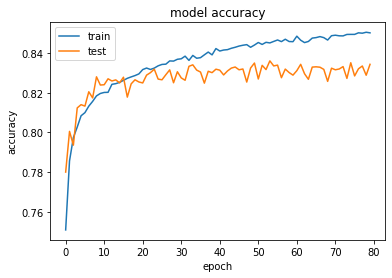

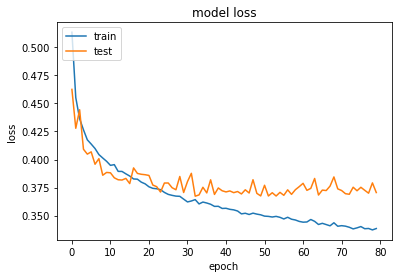

Ende des Versuchs: 


In [18]:
dense_layers = [1]
layer_sizes = [150]
conv_layers = [2]
kernal_size = [(2,2)]
for filter_size in kernal_size:
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:

                NAME ="PMT-MuEl-{}-filter_size-{}-conv-{}-nodes-{}-dense".format(filter_size,conv_layer, layer_size, dense_layer) #,int(time.time())
                tensorboard = TensorBoard(log_dir = 'logs\PMTsmall\{}'.format(NAME))


                model = Sequential()
                model.add(Conv2D(layer_size,filter_size,strides=1, input_shape= XL.shape[1:],activation="relu", padding='same'))                                               
                model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                for l in range(conv_layer-1):                   
                    model.add(Conv2D(layer_size,filter_size,padding='same',activation="relu"))              
                    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))            
                #model.add(GlobalAveragePooling2D())
                model.add(Flatten())
                for l in range(dense_layer-1):
                    model.add(Dense(512-l*20 ,activation="relu" ))
                    model.add(BatchNormalization())
                    model.add(Dropout(0.2))
                model.add(Dense(32,activation="relu"))
                model.add(BatchNormalization())
                model.add(Dropout(0.2))
                model.add(Dense(2))
                model.add(Activation('softmax'))
                #adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, epsilon = 0.001)
                model.compile(loss="binary_crossentropy",
                             optimizer="adam",
                              metrics=['accuracy']
                             )   
                filepath="PMT_24_PID_120k-improvement-val-acc_{val_acc:.2f}.model"  
                checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
                #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
                model.summary()
                history=model.fit(XTraining,YTraining,
              validation_data=(XVal,Yval)
              ,batch_size=100,
                shuffle=True,
                class_weight='balanced',
                callbacks=[
                            #monitor,
                            checkpoint,
                            #tensorboard 
                ],
              epochs= 80)
                print(history.history.keys())
                # summarize history for accuracy
                plt.plot(history.history['acc'])
                plt.plot(history.history['val_acc'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                # summarize history for loss
                plt.plot(history.history['loss'])
                plt.plot(history.history['val_loss'])
                plt.title('model loss')
                plt.ylabel('loss')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()

                print("Ende des Versuchs: ")
            

In [19]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.3565329247734937
Test accuracy:  0.83852047


# Tensorboard

cd "Documents\Python\CNN_Masterarbeit"

tensorboard --logdir=logs/ --host localhost --port 8088

tensorboard --logdir=logs/Overfitting_Studie --host localhost --port 8088

tensorboard --logdir=logs/Modell_Studie --host localhost --port 8088

tensorboard --logdir=logs/MuonElectron --host localhost --port 8088

tensorboard --logdir=BeamlikePI/logs/Time --host localhost --port 8088

# Evaluate

In [67]:
XTest.shape

(15005, 10, 16, 2)

In [82]:
pickle_out = open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Test_LAPPD(1x1)_120k.pickle","wb")
pickle.dump(XTest,pickle_out,protocol=4)
pickle_out.close()
pickle_out = open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Test_LAPPD(1x1)_120k.pickle","wb")
pickle.dump(YTest,pickle_out,protocol=4)
pickle_out.close()

In [30]:
model = tf.keras.models.load_model("PMT_24_PID_120k-improvement-val-acc_0.84.model")

W0521 13:34:22.750493  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0521 13:34:22.766009  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0521 13:34:22.781656  8792 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

In [77]:
#LAPPD
model = tf.keras.models.load_model("LAPPD(1x1)_PID_120k-improvement-val-acc_0.83.model")

#Combined
#model = tf.keras.models.load_model("PMTOnly_Combined_PI_120k-60epoch_-improvement-val-acc_0.93.model")
#model = tf.keras.models.load_model("PMTOnly_Combined_PI_22k-80epoch-improvement-val-acc_0.92.model")
#Time
#model = tf.keras.models.load_model("PMT_Time_Only_batchnormed_PI_22k-improvement-val-acc_0.81.model")
#Charge
#model = tf.keras.models.load_model("PMT_Charge_Only_batchnormed_PI_22k-improvement-val-acc_0.93.model")

In [6]:
len(X)

120005

In [8]:
XTestC = X[:,:,:,0].reshape(120005,10,16,1)

In [12]:

print(XTestC.shape,Y.shape)
for sample in Y[:20]:
    print(sample)

(120005, 10, 16, 1) (120005, 2)
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]


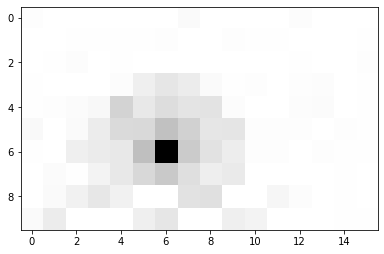

In [75]:
plt.imshow(XTest[7,:,:,0], cmap='binary', interpolation='None')

## Combined

In [78]:
### LAPPD
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.36467623370204594
Test accuracy:  0.8353882


In [56]:
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.35680383114329917
Test accuracy:  0.90992105


## Charge

In [13]:
score = model.evaluate(XTestC, Y, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.23812034977390828
Test accuracy:  0.90469563


In [85]:
score = model.evaluate(XTestC, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.19774321766031458
Test accuracy:  0.92719644


## Time

In [33]:
score = model.evaluate(XTestT, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.4832646434304745
Test accuracy:  0.8005923


# Confusion matrix


In [79]:

#prediction = model.predict(XTestC)
#print(prediction.shape,YTest.shape)
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)


[[5818 1629]
 [ 841 6717]]


In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## LAPPD

[[0.7812542  0.2187458 ]
 [0.11127282 0.88872718]]


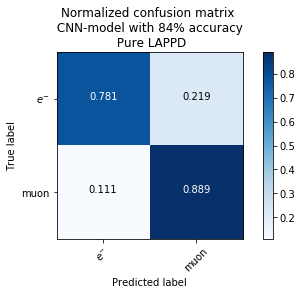

In [80]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 84% accuracy \n Pure LAPPD')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

## ALL PMTS

[[0.90041109 0.09958891]
 [0.03416399 0.96583601]]


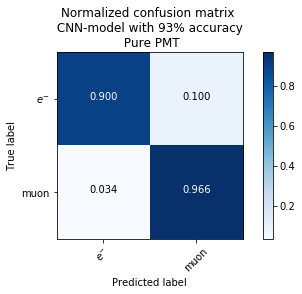

In [58]:
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 93% accuracy \n Pure PMT')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# 24 PMTs

In [62]:
cm2=[[0.79498861,0.20501139],
 [0.11230443,0.88769557]]

[[0.79498861 0.20501139]
 [0.11230443 0.88769557]]


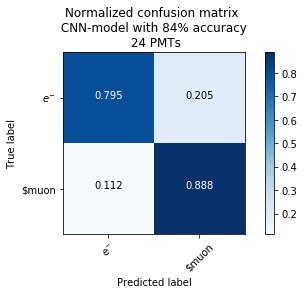

In [81]:
# Reshape into 2 x 2 matrix
#cm = cm.reshape((2,2))
cm2=np.array(cm2)
class_names = [r"$e^{-}$", "$muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm2, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n CNN-model with 84% accuracy \n 24 PMTs')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

In [45]:
from tensorflow import keras
import pydot_ng as pydot
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


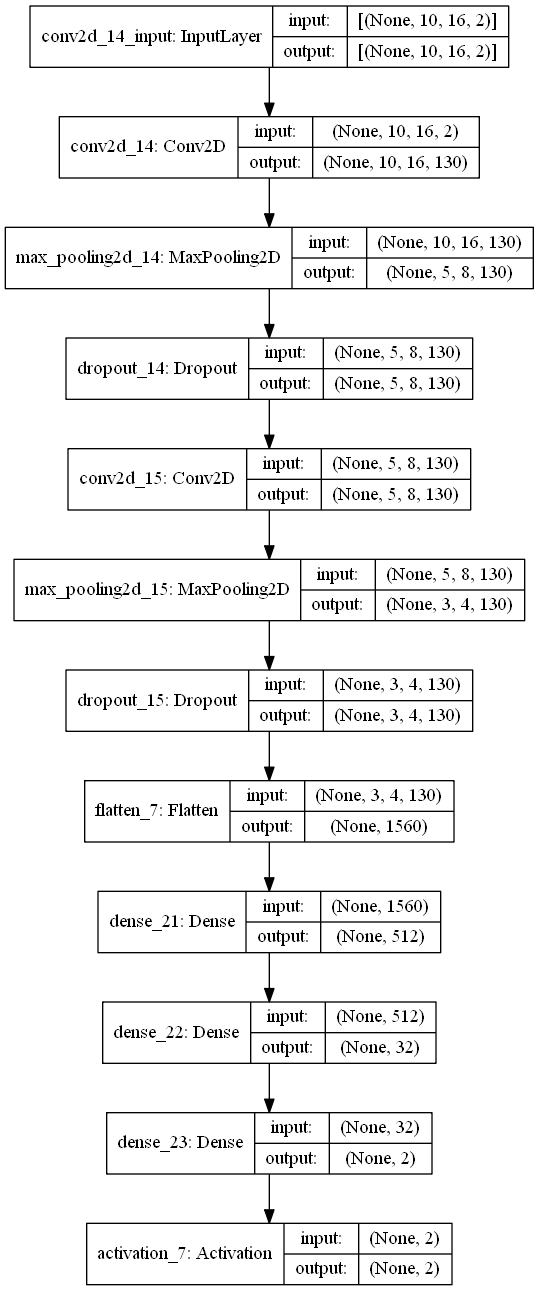

In [46]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [53]:
from matplotlib import pyplot

conv2d_12 (5, 5, 2, 130)


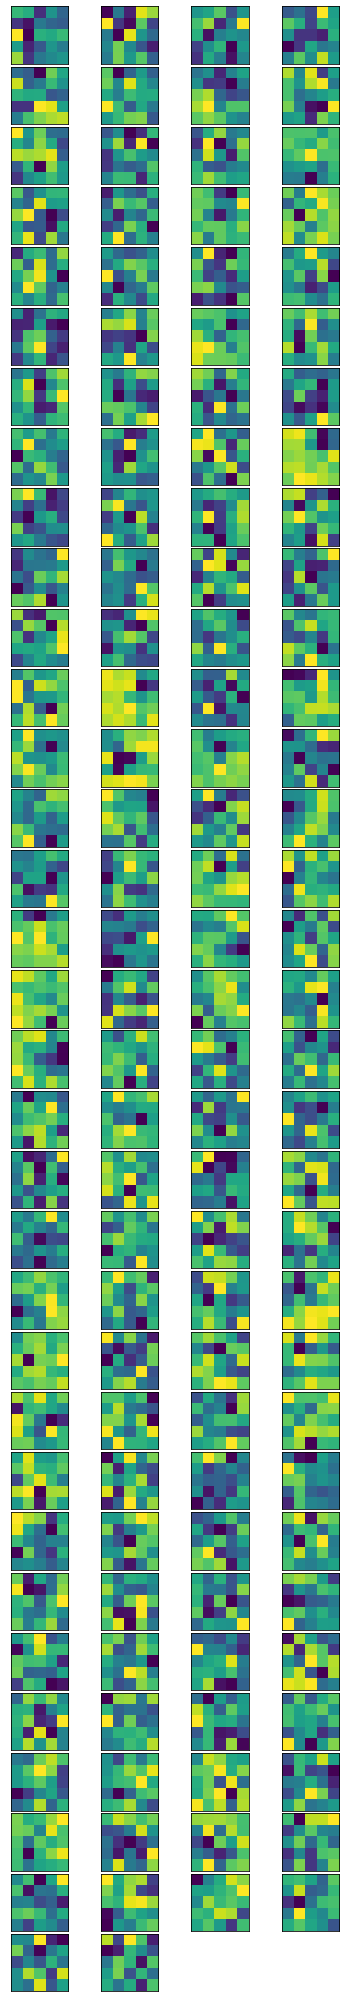

In [56]:
#summarize filter shapes
pyplot.subplots_adjust(wspace = 0.05 ,hspace = 0.05)
for layer in model.layers:
    #check for conv. layer
    if 'conv' not in layer.name:
        continue
    #get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    f_min, f_max= filters.min(),filters.max()
    filters = (filters-f_min)/(f_max-f_min)
    # plot first few filters
    

    n_filters, ix = 130, 1


    for i in range(n_filters):
        #get the filter
        f = filters[:, :, :, i]
        # plot each channel separately

      


        ax = pyplot.subplot(n_filters, 4, ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:,:, 1], cmap='viridis')
        ix += 1
    # show the figure
    #pyplot.savefig("PMT Model 85% layer0 ALL ConvFilters-Time.jpg",format ="jpg", bbox_inches='tight')
    pyplot.show()
    
    break

In [120]:
for j in range(1):
    print(j)

0


In [55]:
plt.rcParams['figure.figsize'] = [6.4, 30*4.8]

In [57]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_12 (?, 10, 16, 130)
3 conv2d_13 (?, 5, 8, 130)


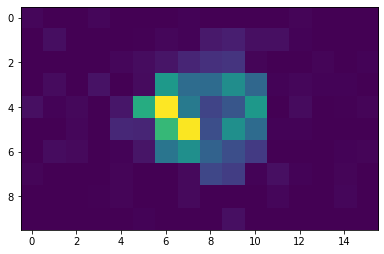

In [58]:
plt.imshow(X[9,:,:,0], cmap='viridis', interpolation='None')

In [86]:
plt.rcParams['figure.figsize'] = [6.4, 10*4.8]

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14_input (InputLayer) [(None, 10, 16, 2)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 16, 130)       6630      
Total params: 6,630
Trainable params: 6,630
Non-trainable params: 0
_________________________________________________________________
(1, 10, 16, 130)


ValueError: num must be 1 <= num <= 52, not 53

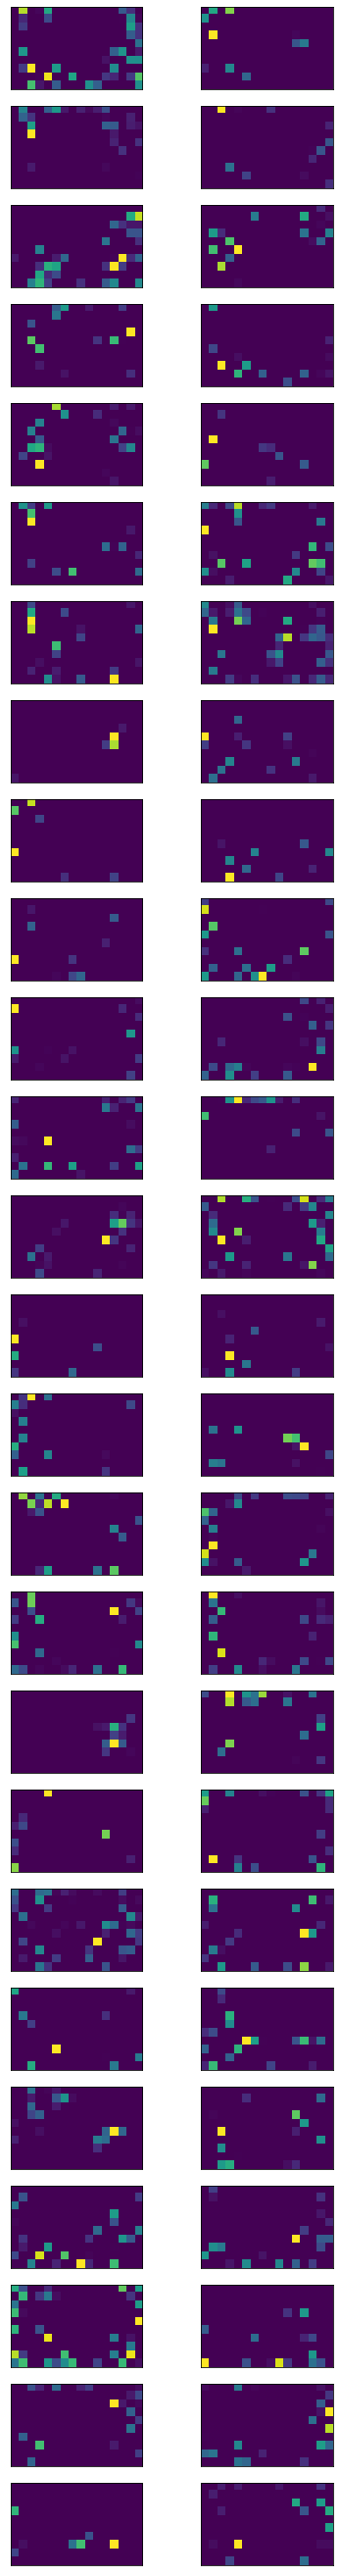

In [89]:
model = tf.keras.models.load_model("PMTOnly_PI_22k_RANDOM-improvement-val-acc_0.93.model")

from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims



ixs = [0]

outputs = [model.layers[i].output for i in ixs]



model = Model(inputs=model.inputs, outputs=model.layers[0].output)

model.summary()





# get feature map for first hidden layer
feature_maps = model.predict(XTest[9:10])
print(feature_maps.shape)
# plot all 64 maps in an 8x8 squares

#for fmap in feature_maps:
ix = 1
a=130
for _ in range(a):
    for _ in range(a):
        if ix==a+1:
            break
        # specify subplot and turn of axis
        ax = pyplot.subplot(26, 2, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1
    # show the figure
#pyplot.savefig("PMT layer0 ALL Conv ElectronEvent9.jpg",format ="jpg", bbox_inches='tight')
pyplot.show()
